# Introduction and Background

One of the most pressing issues that we have in the United States today is poverty. While a common idea is that it involves a person or community lacking the necessary finances, resources, or even shelter. Even so, there is a far-reaching meaning when we closely look at what factors are associated with poverty. This led us to our next interest on how one's income is affected. Thus, in extension to our last project, we will be studying what attributes such as Race, Sex, Age, etc. that may affect an individual's income. We aim to apply the statistical techniques and tools that we have learned from this semester to build predictive models and discover what predictors are significant to this study. Additionally, we were interested in looking at Minnesota and Colorado individually and see how our prediction models compare at the end of the project.

For the purpose of this study, an individual or personal income is reported based on the previous year of the person's wages, salaries, and other type of money income received from an employer.

# Importing Dataset

The data was extracted from the IPUMS website, a public database that provides numerous samples from around the world, where it includes the American Community Survey (ACS) conducted by the U.S Census Bureau. This online database provides us the option to select attributes that cater towards our study in regards to predicting an individual’s income. This dataset will be the 2018 ACS (5-year estimate) and is observational since it has been collected to measure or survey an individual's income levels, demographics, employment rates, etc. for each state. The variables in the dataset includes:

* **YEAR**: Year when the ACS was conducted
* **STATEFIP**: State FIPS Code
* **FAMSIZE**: Number of family members in household **[continuous]**
* **SEX**: Male or Female **[categorical]**
* **AGE**: Age in years  **[continous]**
* **MARRNO**: Number of times the person was married **[continous]**
* **RACE**: Race (original version) **[categorical]**
* **YRSUSA1**: 	Years lived in the US **[continous]**
* **EDUC**: Educational attainment **[categorical]**	
* **CLASSWKR**: Class of worker	 **[continous]**
* **UHRSWORK**: Usual hours worked per week **[continous]**
* **INCWAGE**: Individual's income and salary wage **[continous]**
* **POVERTY**: Poverty Status **[categorical]**
* **OCCSCORE**: Occupational Score **[continous]**
* **DIFFSENS**: Vision or hearing difficulty **[categorical]**

In [15]:
library(dplyr)
library(ggplot2)
library(plyr)
library(zoo)
library(tidyr)
library(ggplot2)
library(gridExtra)
library(tidyverse)
library(leaps)
library(car)
library(corrplot)

acs_2018 = read.table("usa_00007.csv", sep = ",", header = TRUE)
acs_2018_1 = read.table("cleaned_acs_2018.csv", sep = ",", header = TRUE)
head(acs_2018)

summary(acs_2018)
# Filter state to Minnesota
minn = filter(acs_2018, STATEFIP == '27')
minn1 = filter(acs_2018_1, STATEFIP == 'Minnesota')
minn = data.frame(minn)

#Filter state to Colorado
CO = filter(acs_2018, STATEFIP == "8")
CO_Cleaned = filter(acs_2018_1, STATEFIP == "Colorado")

YEAR STATEFIP FAMSIZE SEX AGE MARRNO RACE RACED YRSUSA1 EDUC EDUCD CLASSWKR
1 2018 8        1       1   22  0      1    100   0        6    63   2       
2 2018 8        5       2   58  1      1    100   0        6    63   2       
3 2018 8        5       1   58  1      1    100   0       11   115   1       
4 2018 8        5       2   34  1      1    100   0       11   114   2       
5 2018 8        5       1   39  1      1    100   0       11   114   2       
6 2018 8        2       2   60  1      1    100   0       10   101   2       
  CLASSWKRD UHRSWORK INCWAGE POVERTY OCCSCORE DIFFSENS
1 25        70       31852     0     20       2       
2 22        25       31852   501     25       1       
3 13        20           0   501     62       1       
4 23        40       53086   501     42       1       
5 23        40       44593   501     27       1       
6 22        45       47778   501     42       1

      YEAR         STATEFIP        FAMSIZE            SEX       
 Min.   :2018   Min.   : 8.00   Min.   : 1.000   Min.   :1.000  
 1st Qu.:2018   1st Qu.: 8.00   1st Qu.: 2.000   1st Qu.:1.000  
 Median :2018   Median :27.00   Median : 2.000   Median :2.000  
 Mean   :2018   Mean   :17.52   Mean   : 2.573   Mean   :1.504  
 3rd Qu.:2018   3rd Qu.:27.00   3rd Qu.: 3.000   3rd Qu.:2.000  
 Max.   :2018   Max.   :27.00   Max.   :17.000   Max.   :2.000  
      AGE            MARRNO            RACE           RACED      
 Min.   :18.00   Min.   :0.0000   Min.   :1.000   Min.   :100.0  
 1st Qu.:34.00   1st Qu.:1.0000   1st Qu.:1.000   1st Qu.:100.0  
 Median :50.00   Median :1.0000   Median :1.000   Median :100.0  
 Mean   :49.63   Mean   :0.9672   Mean   :1.408   Mean   :142.2  
 3rd Qu.:63.00   3rd Qu.:1.0000   3rd Qu.:1.000   3rd Qu.:100.0  
 Max.   :95.00   Max.   :3.0000   Max.   :9.000   Max.   :990.0  
    YRSUSA1           EDUC            EDUCD           CLASSWKR   
 Min.   : 0.00   

Here, we would like to build predictive models and formulate a hypothesis in regards to the potential predictors that may affect an individual income or wage (**INCWAGE**) for the state of Colorado and Minnesota. Additionally, IPUMS provides a Data Documentation Initiative (DDI) file, in short, this is to help us relabel some values that were assigned to decriptive labels (i.e, the variable **SEX**, Male and Female code values are 1 and 2 respectively) and provide us with details regarding the variables that are included in the dataset.

# Method and Results #

After importing the dataset, a large portion of the project was spent cleaning and manipulationg the dataset. The process consited of merging datasets, fixing structural errors, removing irrelevant data, and amending variables in order to ensure the dataset are consistent with each other. The unfiltered dataset had raw numerical values that corresponded with a category, while the cleaned dataset had category descriptive values. However, due to complications, Anaconda environment did not support the **ipumsr** package. To work around this issue, we utilized R Studio and read_ipums_ddi() function to relabel the values within the original dataset to a more detailed label.

To polish our datasets, we worked with both the unfiltered and cleaned the dataset to impute correct values and corresponding descriptions. We noticed that there were variables had values that represented NA's and to many descriptive elements for what we needed. The mismatched values were then removed by replacing the zero's with NA's so that the linear model do not interpret these zero values as actual input. We reduced the amount of description for the Race and Education variables due to having a subtantial amount of redundant factors.

In [16]:
# Utilized R Studio in order to use ipumsr package to relabel values to the actual labels
# i.e, SEX values 1 will be changed to Male
minn$MARST = minn1$MARST
minn$CLASSWKR = minn1$CLASSWKR
minn$DIFFSENS = minn1$DIFFSENS
minn$SEX = minn1$SEX

# Grouping Chinese, Japanese, Other Asian, and Pacific Islander to Asian American
minn$RACE[minn$RACE == 1] = "White"
minn$RACE[minn$RACE == 2] = "Black/African American"
minn$RACE[minn$RACE == 3] = "American Indian or Alaska Native"
minn$RACE[minn$RACE == 4] = "Asian American or Pacific Islander"
minn$RACE[minn$RACE == 5] = "Asian American or Pacific Islander"
minn$RACE[minn$RACE == 6] = "Asian American or Pacific Islander"
minn$RACE[minn$RACE == 7] = "Other Race"
minn$RACE[minn$RACE == 8] = "Other Race"
minn$RACE[minn$RACE == 9] = "Other Race"

# Grouping Education Levels
minn$EDUC[minn$EDUC == 0] = "High School or Less"
minn$EDUC[minn$EDUC == 1] = "High School or Less"
minn$EDUC[minn$EDUC == 2] = "High School or Less"
minn$EDUC[minn$EDUC == 3] = "High School or Less"
minn$EDUC[minn$EDUC == 4] = "High School or Less"
minn$EDUC[minn$EDUC == 5] = "High School or Less"
minn$EDUC[minn$EDUC == 6] = "High School or Less"
minn$EDUC[minn$EDUC == 7] = "College or More"
minn$EDUC[minn$EDUC == 8] = "College or More"
minn$EDUC[minn$EDUC == 9] = "College or More"
minn$EDUC[minn$EDUC == 10] = "College or More"
minn$EDUC[minn$EDUC == 11] = "College or More"

# Changing 0 to NA, this is because of the IPUMS package used in R Studio changed the NA values to 0
minn$YRSUSA1[minn$YRSUSA1 == 0] = NA

# Utilized R Studio in order to use ipumsr package to relabel values to the actual labels
# i.e, SEX values 1 will be changed to Male
CO$MARST = CO_Cleaned$MARST
CO$CLASSWKR = CO_Cleaned$CLASSWKR
CO$DIFFSENS = CO_Cleaned$DIFFSENS
CO$SEX = CO_Cleaned$SEX

# Grouping Chinese, Japanese, Other Asian, and Pacific Islander to Asian American
CO$RACE[CO$RACE == 1] = "White"
CO$RACE[CO$RACE == 2] = "Black/African American"
CO$RACE[CO$RACE == 3] = "American Indian or Alaska Native"
CO$RACE[CO$RACE == 4] = "Asian American or Pacific Islander"
CO$RACE[CO$RACE == 5] = "Asian American or Pacific Islander"
CO$RACE[CO$RACE == 6] = "Asian American or Pacific Islander"
CO$RACE[CO$RACE == 7] = "Other Race"
CO$RACE[CO$RACE == 8] = "Other Race"
CO$RACE[CO$RACE == 9] = "Other Race"

# Grouping Education Levels
CO$EDUC[CO$EDUC == 0] = "High School or Less"
CO$EDUC[CO$EDUC == 1] = "High School or Less"
CO$EDUC[CO$EDUC == 2] = "High School or Less"
CO$EDUC[CO$EDUC == 3] = "High School or Less"
CO$EDUC[CO$EDUC == 4] = "High School or Less"
CO$EDUC[CO$EDUC == 5] = "High School or Less"
CO$EDUC[CO$EDUC == 6] = "High School or Less"
CO$EDUC[CO$EDUC == 7] = "College or More"
CO$EDUC[CO$EDUC == 8] = "College or More"
CO$EDUC[CO$EDUC == 9] = "College or More"
CO$EDUC[CO$EDUC == 10] = "College or More"
CO$EDUC[CO$EDUC == 11] = "College or More"

# Changing 0 to NA, this is because of the IPUMS package used 
# in R Studio changed the NA values to 0
CO$YRSUSA1[CO$YRSUSA1 == 0] = NA

# FAMSIZE, AGE, MARRNO, YRSUSA1, UHRSWORK, INCWAGE, OCCSCORE are continuous

In [25]:
mn = select(minn, -c(YEAR, STATEFIP, RACED, CLASSWKRD, EDUCD, POVERTY))
co = select(CO, -c(YEAR, STATEFIP, RACED, CLASSWKRD, EDUCD, POVERTY))
head(mn)

FAMSIZE SEX    AGE MARRNO RACE  YRSUSA1 EDUC                CLASSWKR       
1 3       Male   37  1      White NA      College or More     Works for wages
2 3       Female 37  1      White NA      College or More     Works for wages
3 2       Female 25  0      White NA      College or More     Works for wages
4 5       Female 43  1      White NA      College or More     Works for wages
5 5       Male   42  1      White NA      College or More     Works for wages
6 5       Female 18  0      White NA      High School or Less N/A            
  UHRSWORK INCWAGE OCCSCORE DIFFSENS                       
1 40        39815  42       No vision or hearing difficulty
2 50       106173  42       No vision or hearing difficulty
3 36        16988  16       No vision or hearing difficulty
4 32        45654  25       No vision or hearing difficulty
5 50        63704  30       No vision or hearing difficulty
6  0            0   0       No vision or hearing difficulty

Following the data cleaning process, we performed simple graphical summeries of the dataset to explore each variables, where we color coordinated the states with blue and green to Minnesota and Colorado respectively. This is to help distinguish between the plots, to remove any confusions, we will be keeping the colors consistent with the corresponding states. Furthermore, these graphical summaries is to help identify any new noticeable irregularies of the dataset. Note that **OCCSCORE** has an unusual amount of $0$ values, this was a similar irregularity that we found during the cleaning process. Thus, we replaced these values to NA to help with our analysis process later.

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Removed 203025 rows containing non-finite values (stat_count).”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: b

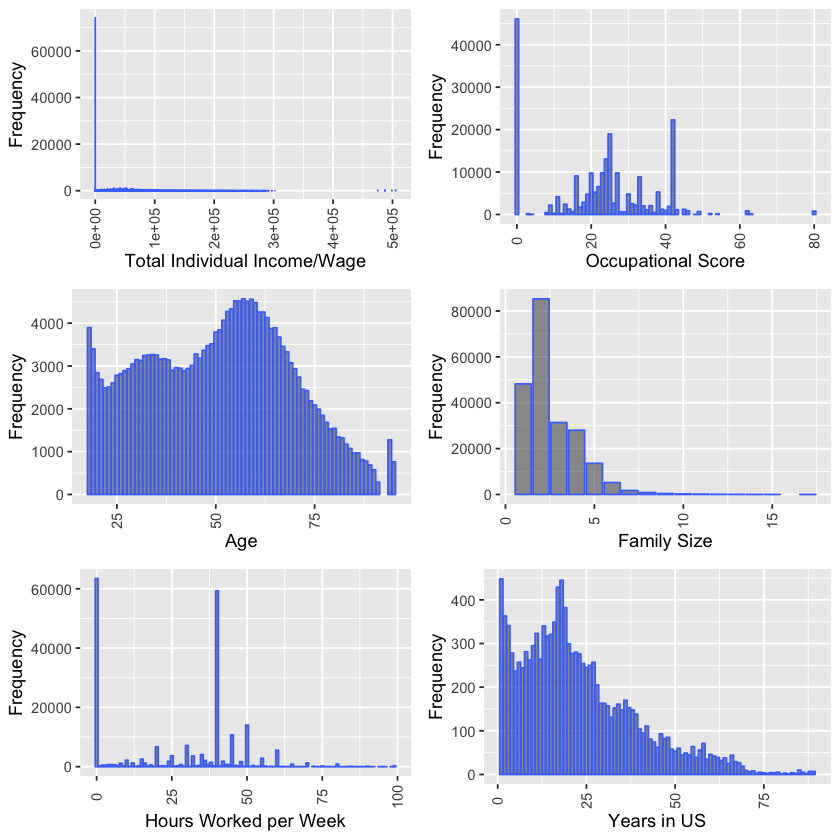

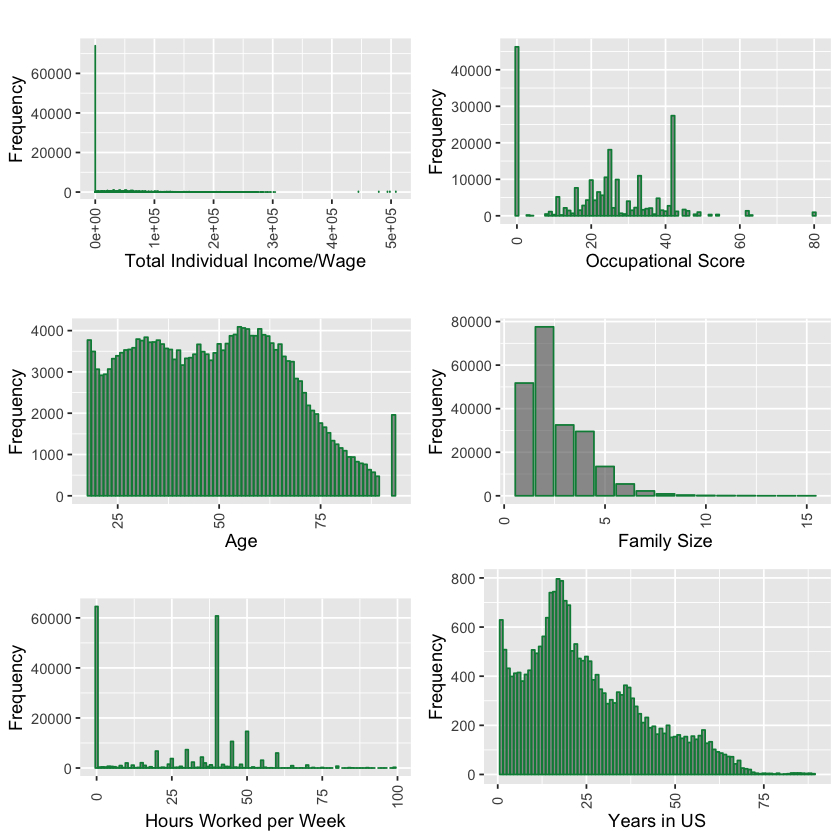

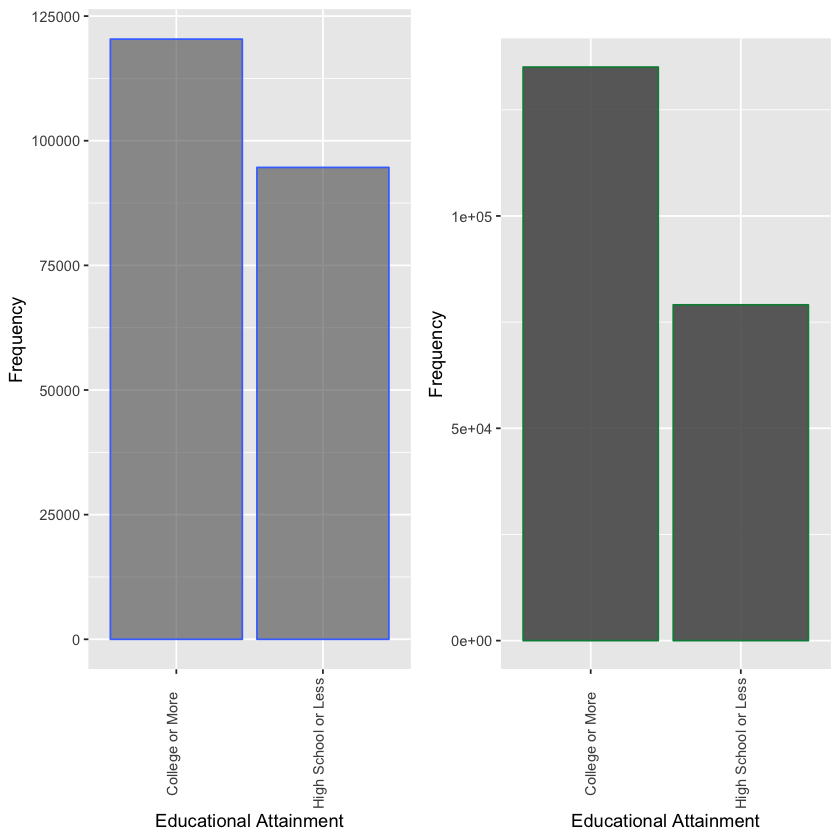

In [18]:
# Exploratory Data Analysis

# Histograms for numeric values
age_hist <- ggplot(mn, aes(x = mn$AGE)) +
    geom_histogram(color="royalblue1", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Age") + 
    ylab("Frequency") + labs(fill = "") + theme(legend.position = "none")

famsize_hist <- ggplot(mn, aes(x = mn$FAMSIZE)) +
    geom_histogram(color="royalblue1", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Family Size") + 
    ylab("Frequency") + labs(fill = "") + theme(legend.position = "none")

hours_hist <- ggplot(mn, aes(x = mn$UHRSWORK)) +
    geom_histogram(color="royalblue1", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Hours Worked per Week") + 
    ylab("Frequency") + labs(fill = "") + theme(legend.position = "none")

edu_hist_m <- ggplot(mn, aes(x = mn$EDUC)) +
    geom_histogram(color="royalblue1", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.1)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Educational Attainment") + 
    ylab("Frequency") + labs(fill = "") + theme(legend.position = "none")

inc_hist <- ggplot(mn, aes(x = mn$INCWAGE)) +
    geom_histogram(color="royalblue1", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Total Individual Income/Wage") + 
    ylab("Frequency") + labs(fill = "") + theme(legend.position = "none")

occ_hist <- ggplot(mn, aes(x = mn$OCCSCORE)) +
    geom_histogram(color="royalblue1", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Occupational Score") + 
    ylab("Frequency") + labs(fill = "") + theme(legend.position = "none")

years_hist <- ggplot(mn, aes(x = mn$YRSUSA1)) +
    geom_histogram(color="royalblue1", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Years in US") + 
    ylab("Frequency") + labs(fill = "") + theme(legend.position = "none")
grid.arrange(inc_hist, occ_hist, age_hist, famsize_hist, 
             hours_hist, years_hist, nrow=3)

# Colorado Exploratory Data Analysis

# Histograms for numeric values
age_hist <- ggplot(co, aes(x = co$AGE)) +
    geom_histogram(color="springgreen4", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Age") + 
    ylab("Frequency") + labs(fill = "") + ggtitle("") + theme(legend.position = "none")

famsize_hist <- ggplot(co, aes(x = co$FAMSIZE)) +
    geom_histogram(color="springgreen4", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Family Size") + 
    ylab("Frequency") + labs(fill = "") + ggtitle("") + theme(legend.position = "none")

hours_hist <- ggplot(co, aes(x = co$UHRSWORK)) +
    geom_histogram(color="springgreen4", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Hours Worked per Week") + 
    ylab("Frequency") + labs(fill = "") + ggtitle("") + theme(legend.position = "none")

edu_hist_c <- ggplot(co, aes(x = co$EDUC)) +
    geom_histogram(color="springgreen4", alpha=0.9, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Educational Attainment") + 
    ylab("Frequency") + labs(fill = "") + ggtitle("") + theme(legend.position = "none")

inc_hist <- ggplot(co, aes(x = co$INCWAGE)) +
    geom_histogram(color="springgreen4", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Total Individual Income/Wage") + 
    ylab("Frequency") + labs(fill = "") + ggtitle("") + theme(legend.position = "none")

occ_hist <- ggplot(co, aes(x = co$OCCSCORE)) +
    geom_histogram(color="springgreen4", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Occupational Score") + 
    ylab("Frequency") + labs(fill = "") + ggtitle("") + theme(legend.position = "none")

years_hist <- ggplot(co, aes(x = co$YRSUSA1)) +
    geom_histogram(color="springgreen4", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Years in US") + 
    ylab("Frequency") + labs(fill = "") + theme(legend.position = "none")

grid.arrange(inc_hist, occ_hist, age_hist, famsize_hist, hours_hist, years_hist,
             nrow=3)

grid.arrange(edu_hist_m, edu_hist_c, nrow=1)

Warning message:
“Removed 203025 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 203025 rows containing missing values (geom_point).”

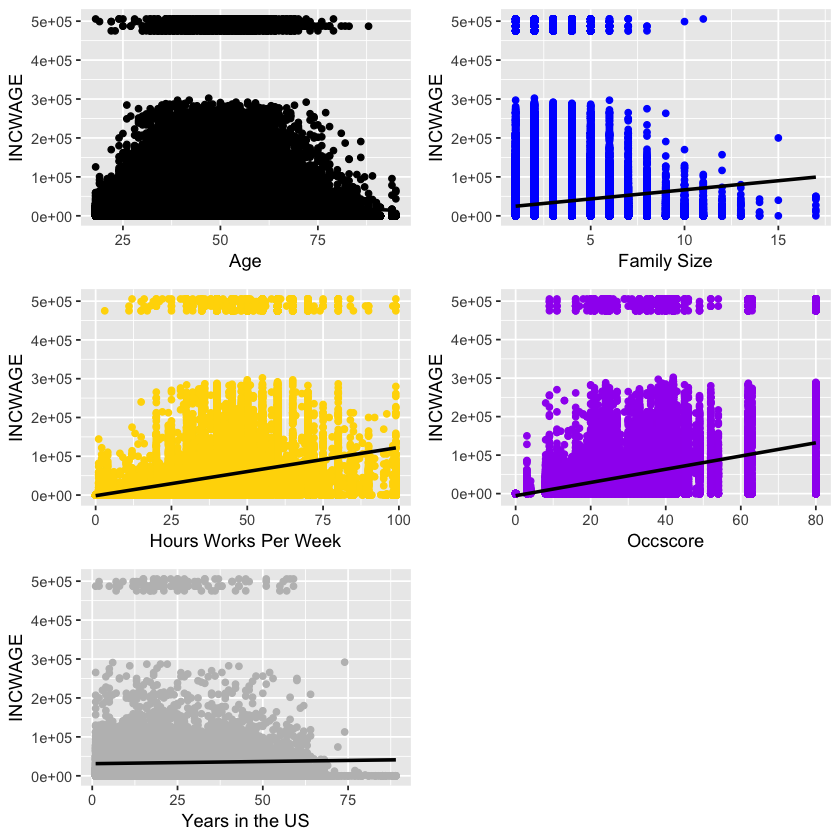

In [6]:
plot1 <- ggplot(mn, aes(y = mn$INCWAGE, x = mn$AGE)) + 
  geom_point(color = 'royalblue1') + xlab('Age') + ylab('INCWAGE') + 
  stat_smooth(method = "lm", col = "black")

plot2 <- ggplot(mn, aes(y = mn$INCWAGE, x = mn$FAMSIZE)) + 
  geom_point(color = 'royalblue1') + xlab('Family Size') + ylab('INCWAGE') + 
  stat_smooth(method = "lm", col = "black")

plot3 <- ggplot(mn, aes(y = mn$INCWAGE, x = mn$UHRSWORK)) + 
  geom_point(color = 'royalblue1') + xlab('Hours Works Per Week') + ylab('INCWAGE') + 
  stat_smooth(method = "lm", col = "black")

plot4 <- ggplot(mn, aes(y = mn$INCWAGE, x = mn$OCCSCORE)) + 
  geom_point(color = 'royalblue1') + xlab('Occscore') + ylab('INCWAGE') + 
  stat_smooth(method = "lm", col = "black")

plot5 <- ggplot(mn, aes(y = mn$INCWAGE, x = mn$YRSUSA1)) + 
  geom_point(color = 'royalblue1') + xlab('Years in the US') + ylab('INCWAGE') + 
  stat_smooth(method = "lm", col = "black")

grid.arrange(plot1, plot2, plot3, plot4, plot5, nrow = 3, ncol = 2)

In [26]:
mn$OCCSCORE[mn$OCCSCORE == 0] = NA
co$OCCSCORE[co$OCCSCORE == 0] = NA

# AIC and BIC Graphs

(Intercept) FAMSIZE SEXMale AGE   MARRNO
1 TRUE        FALSE   FALSE   FALSE FALSE 
2 TRUE        FALSE   FALSE   FALSE FALSE 
3 TRUE        FALSE   FALSE    TRUE FALSE 
4 TRUE        FALSE   FALSE   FALSE FALSE 
5 TRUE        FALSE   FALSE    TRUE FALSE 
6 TRUE        FALSE   FALSE    TRUE FALSE 
7 TRUE        FALSE    TRUE    TRUE FALSE 
8 TRUE        FALSE    TRUE    TRUE  TRUE 
  RACEAsian American or Pacific Islander RACEBlack/African American
1 FALSE                                  FALSE                     
2 FALSE                                  FALSE                     
3 FALSE                                  FALSE                     
4 FALSE                                  FALSE                     
5 FALSE                                  FALSE                     
6 FALSE                                  FALSE                     
7 FALSE                                  FALSE                     
8 FALSE                                  FALSE                     
  RACEOther Race RACEWhite YRSUSA1 EDUCHigh School or Less
1 FALSE          FALSE     FALSE   FALSE                  
2 FALSE          FALSE     FALSE   FALSE                  
3 FALSE          FALSE     FALSE   FALSE                  
4 FALSE          FALSE     FALSE   FALSE                  
5 FALSE          FALSE     FALSE   FALSE                  
6 FALSE          FALSE     FALSE    TRUE                  
7 FALSE          FALSE     FALSE    TRUE                  
8 FALSE          FALSE     FALSE    TRUE                  
  CLASSWKRSelf-employed CLASSWKRWorks for wages UHRSWORK OCCSCORE
1 FALSE                 FALSE                   FALSE    TRUE    
2 FALSE                 FALSE                    TRUE    TRUE    
3 FALSE                 FALSE                    TRUE    TRUE    
4  TRUE                  TRUE                    TRUE    TRUE    
5  TRUE                  TRUE                    TRUE    TRUE    
6  TRUE                  TRUE                    TRUE    TRUE    
7  TRUE                  TRUE                    TRUE    TRUE    
8  TRUE                  TRUE                    TRUE    TRUE    
  DIFFSENSNo vision or hearing difficulty
1 FALSE                                  
2 FALSE                                  
3 FALSE                                  
4 FALSE                                  
5 FALSE                                  
6 FALSE                                  
7 FALSE                                  
8 FALSE

(Intercept) FAMSIZE SEXMale AGE   MARRNO
1 TRUE        FALSE   FALSE   FALSE FALSE 
2 TRUE        FALSE   FALSE   FALSE FALSE 
3 TRUE        FALSE   FALSE   FALSE FALSE 
4 TRUE        FALSE   FALSE   FALSE FALSE 
5 TRUE        FALSE   FALSE   FALSE FALSE 
6 TRUE        FALSE   FALSE    TRUE FALSE 
7 TRUE        FALSE    TRUE    TRUE FALSE 
8 TRUE        FALSE    TRUE    TRUE  TRUE 
  RACEAsian American or Pacific Islander RACEBlack/African American
1 FALSE                                  FALSE                     
2 FALSE                                  FALSE                     
3 FALSE                                  FALSE                     
4 FALSE                                  FALSE                     
5 FALSE                                  FALSE                     
6 FALSE                                  FALSE                     
7 FALSE                                  FALSE                     
8 FALSE                                  FALSE                     
  RACEOther Race RACEWhite YRSUSA1 EDUCHigh School or Less
1 FALSE          FALSE     FALSE   FALSE                  
2 FALSE          FALSE     FALSE   FALSE                  
3 FALSE          FALSE     FALSE    TRUE                  
4 FALSE          FALSE     FALSE   FALSE                  
5 FALSE          FALSE     FALSE    TRUE                  
6 FALSE          FALSE     FALSE    TRUE                  
7 FALSE          FALSE     FALSE    TRUE                  
8 FALSE          FALSE     FALSE    TRUE                  
  CLASSWKRSelf-employed CLASSWKRWorks for wages UHRSWORK OCCSCORE
1 FALSE                 FALSE                   FALSE    TRUE    
2 FALSE                 FALSE                    TRUE    TRUE    
3 FALSE                 FALSE                    TRUE    TRUE    
4  TRUE                  TRUE                    TRUE    TRUE    
5  TRUE                  TRUE                    TRUE    TRUE    
6  TRUE                  TRUE                    TRUE    TRUE    
7  TRUE                  TRUE                    TRUE    TRUE    
8  TRUE                  TRUE                    TRUE    TRUE    
  DIFFSENSNo vision or hearing difficulty
1 FALSE                                  
2 FALSE                                  
3 FALSE                                  
4 FALSE                                  
5 FALSE                                  
6 FALSE                                  
7 FALSE                                  
8 FALSE

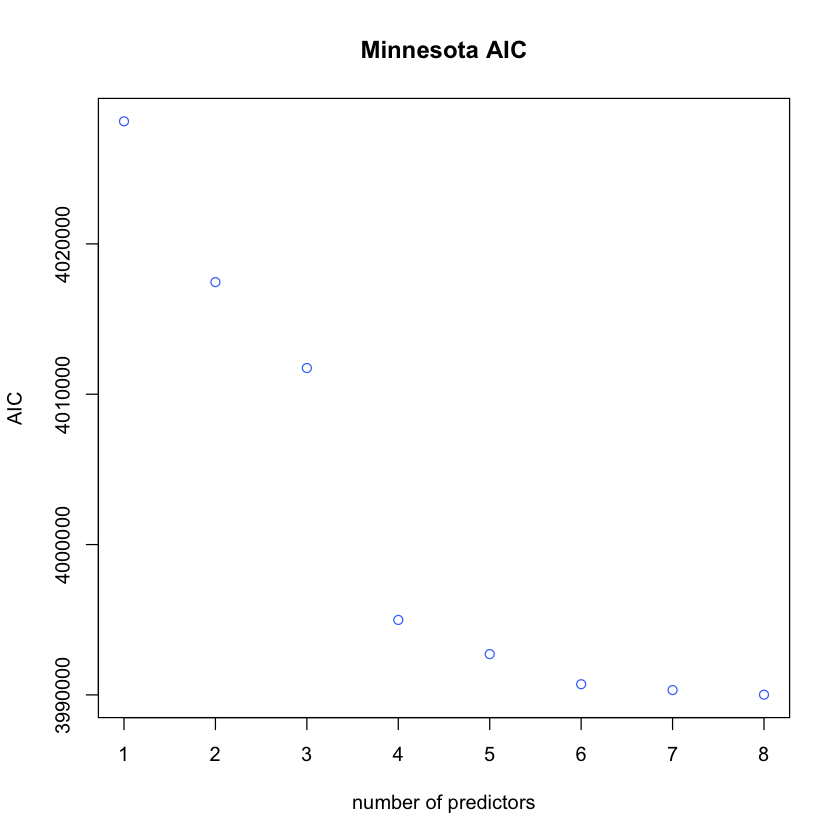

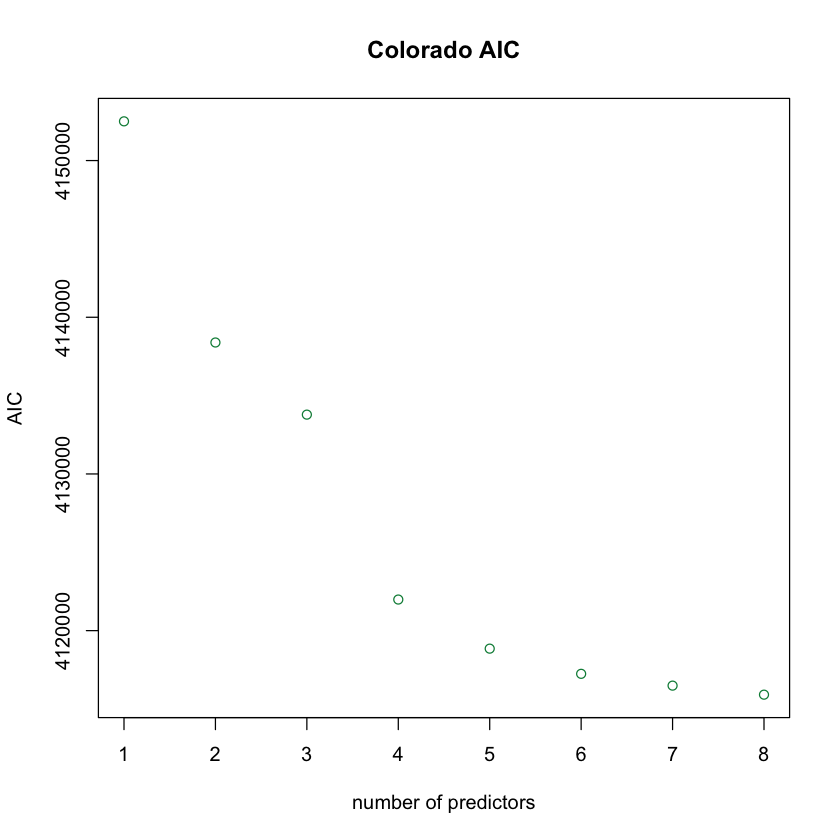

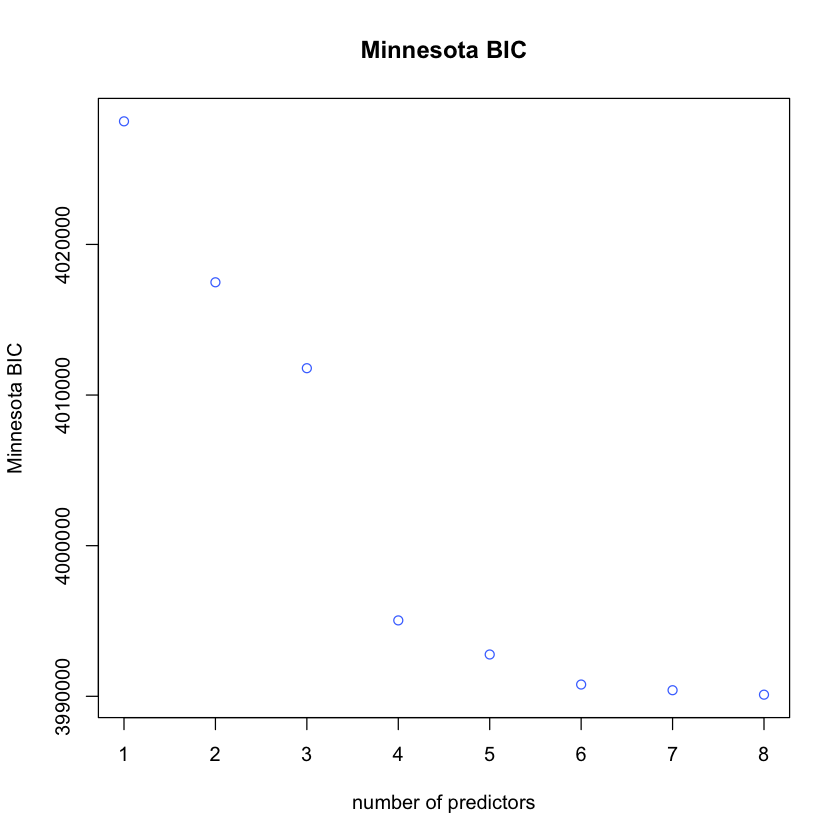

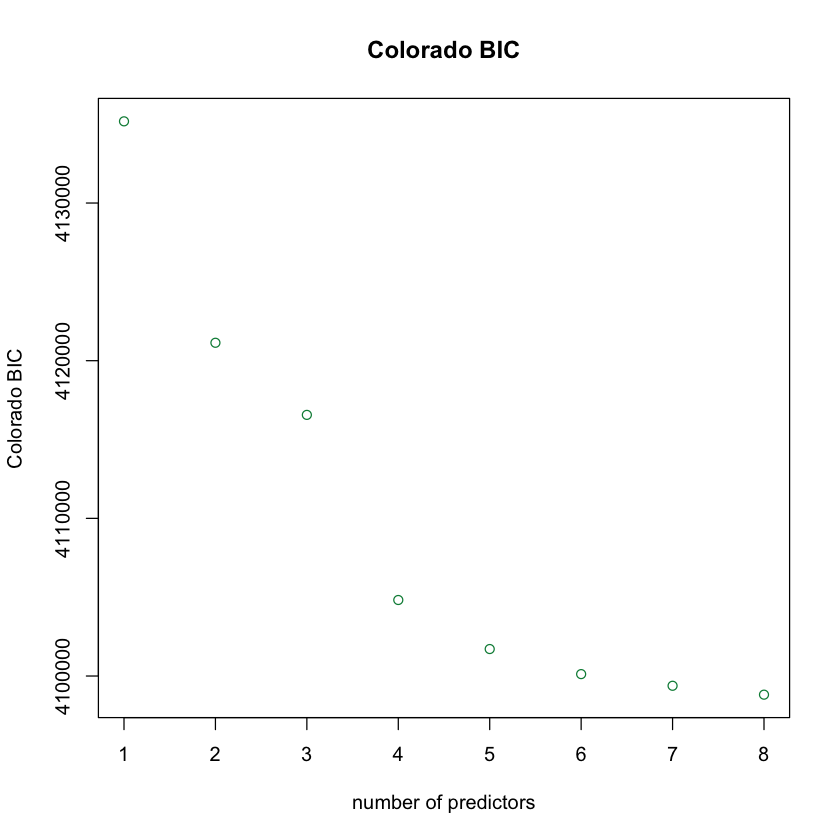

In [19]:
# corr = cor(model.matrix(lmod_co)[,-1])

n = dim(mn)[1]; 
regmn = regsubsets(INCWAGE ~ ., data = mn, really.big=T)
rs = summary(regmn)
rs$which

m = dim(co)[1]; 
regCO = regsubsets(INCWAGE ~ ., data = co, really.big=T)
crs = summary(regCO)
crs$which

AIC_m = 2*(2:9) + n*log(rs$rss/n)
plot(AIC_m ~ I(1:8), xlab = 'number of predictors', ylab = 'AIC', main = "Minnesota AIC",
     col = "royalblue1")

AIC_c = 2*(2:9) + n*log(crs$rss/m)
plot(AIC_c ~ I(1:8), xlab = 'number of predictors', ylab = 'AIC', main = "Colorado AIC",
    col = "springgreen4")

# Best predictors in terms of AIC
# 8 predictors - SEX, AGE, MARRNO, EDUC, CLASSWKR, UHRSWORK, OCCSCORE, DIFFSENS
# 7 predictors - SEX, AGE, EDUC, CLASSWKR, UHRSWORK, OCCSCORE, DIFFSENS
# 6 predictors - AGE, EDUC, CLASSWKR, UHRSWORK, OCCSCORE, DIFFSENS

BIC_m = log(n)*(2:9) + n*log(rs$rss/n) 
plot(BIC_m ~ I(1:8), xlab = "number of predictors", ylab = "Minnesota BIC", 
     main = "Minnesota BIC", col = "royalblue1")

BIC_c = log(m)*(2:9) + m*log(crs$rss/m) 
plot(BIC_c ~ I(1:8), xlab = "number of predictors", ylab = "Colorado BIC", 
     main = "Colorado BIC", col = "springgreen4")

# Best predictors in terms of BIC
# 8 predictors - SEX, AGE, MARRNO, EDUC, CLASSWKR, UHRSWORK, OCCSCORE, DIFFSENS
# 7 predictors - SEX, AGE, EDUC, CLASSWKR, UHRSWORK, OCCSCORE, DIFFSENS
# 6 predictors - AGE, EDUC, CLASSWKR, UHRSWORK, OCCSCORE, DIFFSENS

In [43]:
lm_1 = lm(INCWAGE ~ AGE + EDUC + CLASSWKR + UHRSWORK + OCCSCORE + DIFFSENS , mn)
lm_2 = lm(INCWAGE ~ SEX + AGE + EDUC + CLASSWKR + UHRSWORK + OCCSCORE + DIFFSENS, mn)
lm_3 = lm(INCWAGE ~ SEX + AGE + MARRNO + EDUC + CLASSWKR + UHRSWORK + OCCSCORE + DIFFSENS + RACE, mn)
print("Anova test for Minnesota:")
anova(lm_1, lm_2)
anova(lm_2, lm_3)

lmc_1 = lm(INCWAGE ~ AGE + EDUC + CLASSWKR + UHRSWORK + OCCSCORE + DIFFSENS , co)
lmc_2 = lm(INCWAGE ~ SEX + AGE + EDUC + CLASSWKR + UHRSWORK + OCCSCORE + DIFFSENS, co)
lmc_3 = lm(INCWAGE ~ SEX + AGE + MARRNO + EDUC + CLASSWKR + UHRSWORK + OCCSCORE + DIFFSENS + RACE, co)
print("Anova test for Colorado:")
anova(lmc_1, lmc_2)
anova(lmc_2, lmc_3)

[1] "Anova test for Minnesota:"


Res.Df RSS          Df Sum of Sq    F        Pr(>F)       
1 168917 3.644821e+14 NA           NA       NA            NA
2 168916 3.631246e+14  1 1.357559e+12 631.5009 4.254953e-139

Res.Df RSS          Df Sum of Sq    F        Pr(>F)       
1 168916 3.631246e+14 NA           NA       NA            NA
2 168911 3.620425e+14  5 1.082066e+12 100.9676 1.045826e-106

[1] "Anova test for Colorado:"


Res.Df RSS          Df Sum of Sq    F        Pr(>F)       
1 167836 4.434572e+14 NA           NA       NA            NA
2 167835 4.408451e+14  1 2.612079e+12 994.4497 1.256685e-217

Res.Df RSS          Df Sum of Sq    F       Pr(>F)       
1 167835 4.408451e+14 NA           NA      NA            NA
2 167830 4.395393e+14  5 1.305775e+12 99.7172 2.322946e-105


Call:
lm(formula = INCWAGE ~ SEX + AGE + MARRNO + EDUC + CLASSWKR + 
    UHRSWORK + OCCSCORE + DIFFSENS + RACE, data = mn)

Residuals:
    Min      1Q  Median      3Q     Max 
-164258  -20362   -4825   10900  506757 

Coefficients:
                                          Estimate Std. Error t value Pr(>|t|)
(Intercept)                             -81430.242   1386.776 -58.719  < 2e-16
SEXMale                                   6409.957    235.880  27.175  < 2e-16
AGE                                        202.328      8.741  23.147  < 2e-16
MARRNO                                    4202.674    196.213  21.419  < 2e-16
EDUCHigh School or Less                 -12256.619    241.815 -50.686  < 2e-16
CLASSWKRWorks for wages                  24964.074    347.139  71.914  < 2e-16
UHRSWORK                                  1099.021      6.909 159.061  < 2e-16
OCCSCORE                                  1495.768     11.663 128.245  < 2e-16
DIFFSENSNo vision or hearing difficulty   6066.032    58


Call:
lm(formula = INCWAGE ~ SEX + AGE + MARRNO + EDUC + CLASSWKR + 
    UHRSWORK + OCCSCORE + DIFFSENS + RACE, data = co)

Residuals:
    Min      1Q  Median      3Q     Max 
-170483  -23331   -6141   12370  538433 

Coefficients:
                                          Estimate Std. Error t value Pr(>|t|)
(Intercept)                             -91665.985   1635.907 -56.034  < 2e-16
SEXMale                                   8595.121    259.025  33.183  < 2e-16
AGE                                        325.396      9.943  32.727  < 2e-16
MARRNO                                    3703.868    197.290  18.774  < 2e-16
EDUCHigh School or Less                 -13350.721    277.851 -48.050  < 2e-16
CLASSWKRWorks for wages                  22629.908    383.267  59.045  < 2e-16
UHRSWORK                                  1255.081      7.571 165.764  < 2e-16
OCCSCORE                                  1461.017     12.153 120.217  < 2e-16
DIFFSENSNo vision or hearing difficulty   8708.731    64

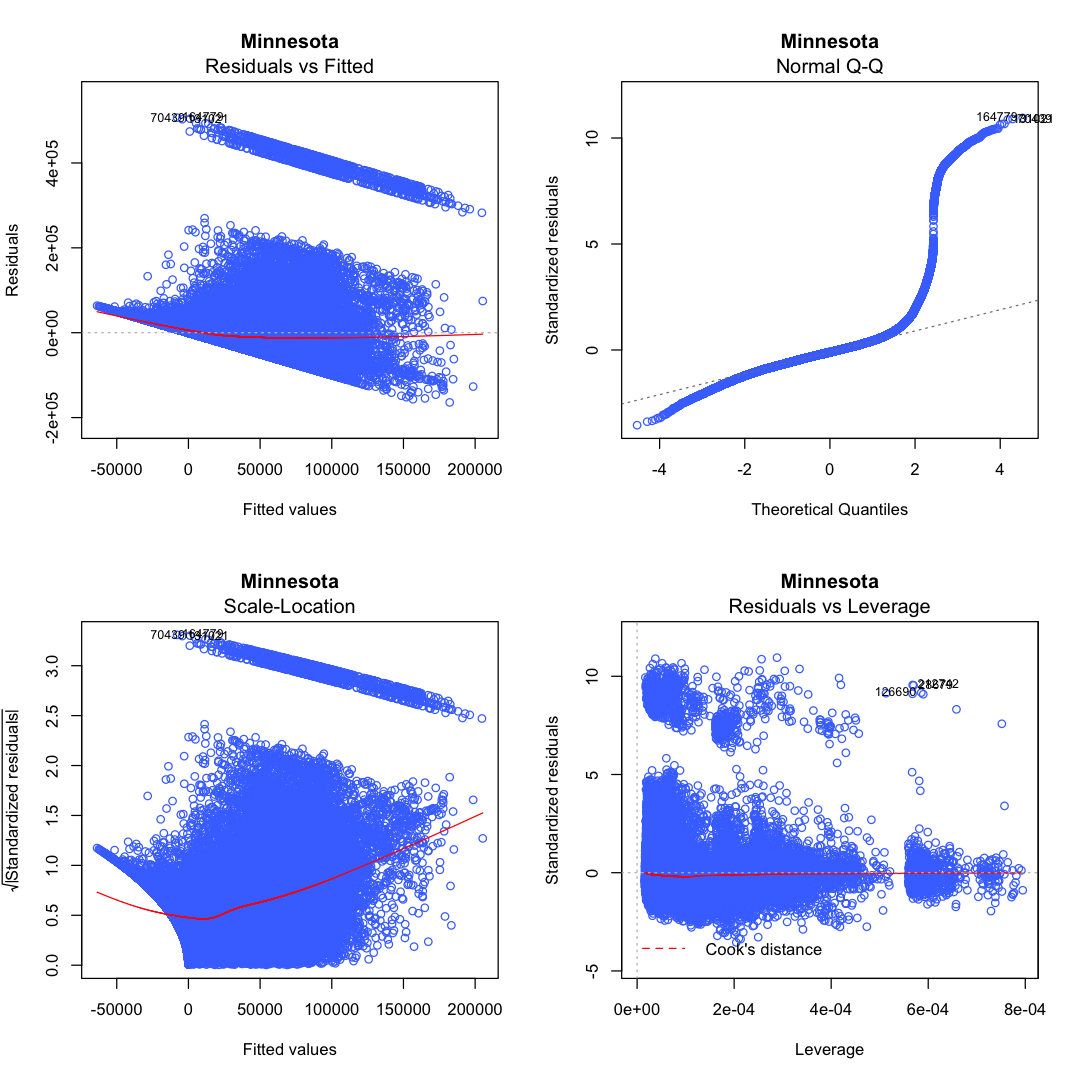

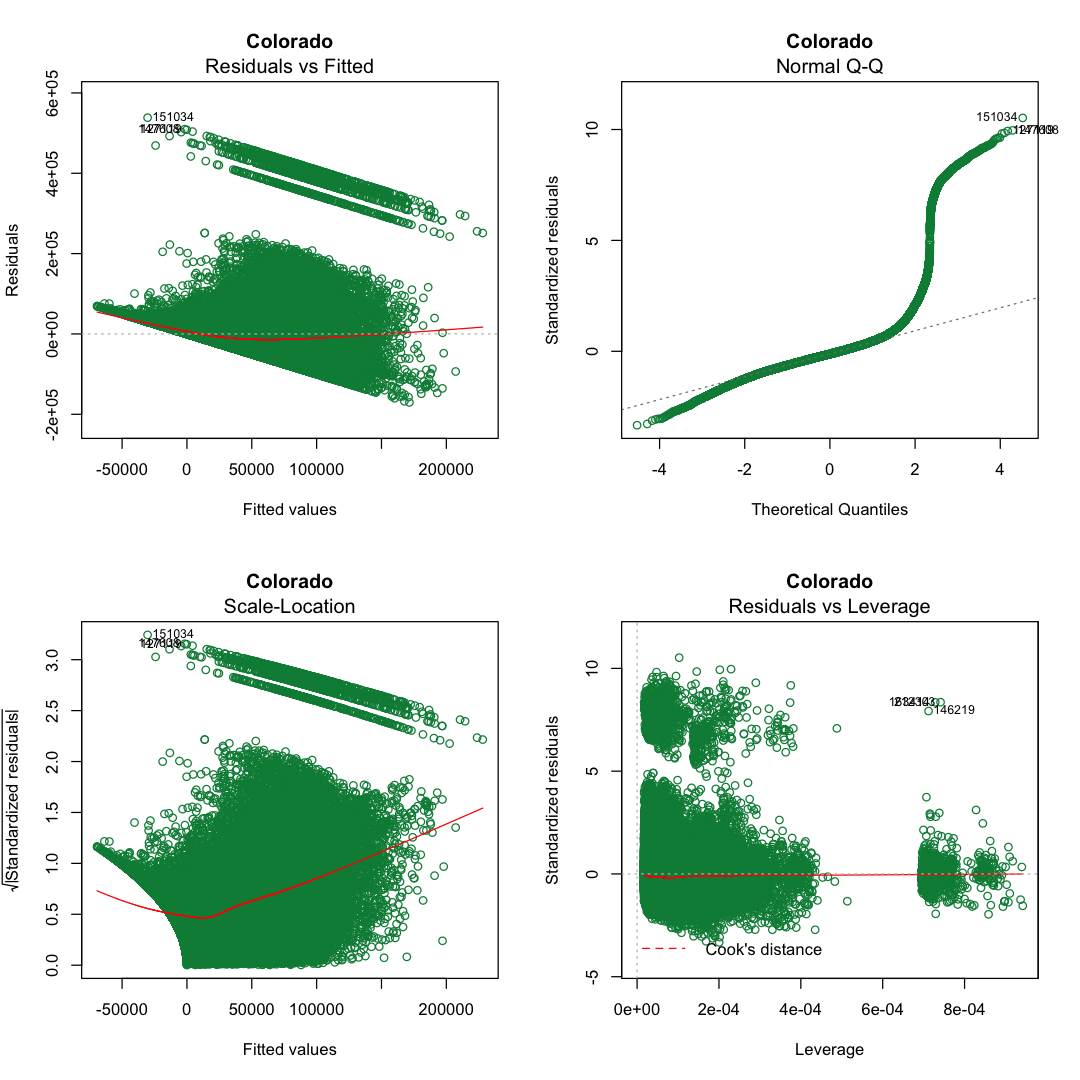

In [28]:
summary(lm_3)
options(repr.plot.width = 9, repr.plot.height = 9)
par(mfrow = c(2,2))
plot(lm_3, main = "Minnesota", col = "royalblue1")

summary(lmc_3)
options(repr.plot.width = 9, repr.plot.height = 9)
par(mfrow = c(2,2))
plot(lmc_3, main = "Colorado", col = "springgreen4")

# Transformations

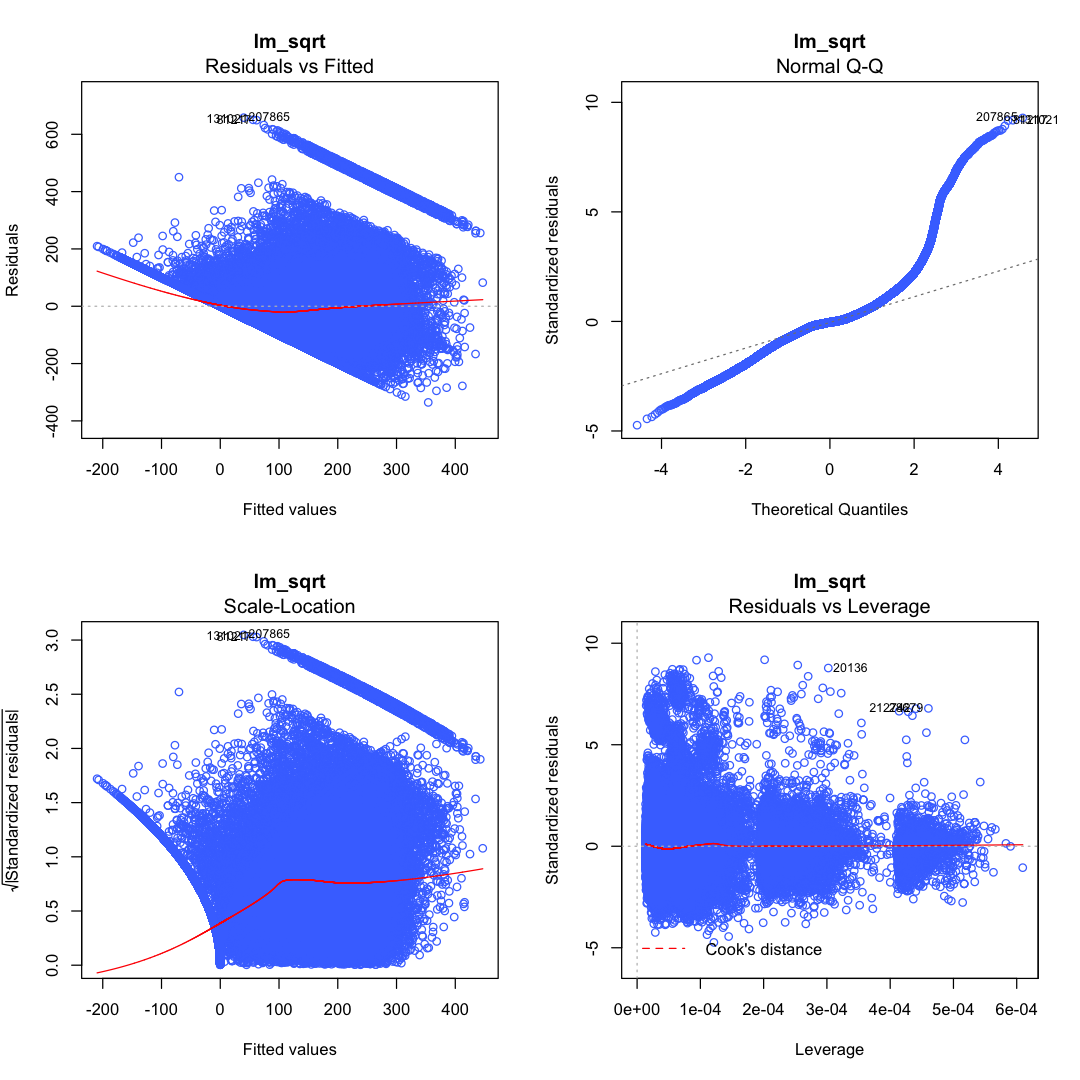

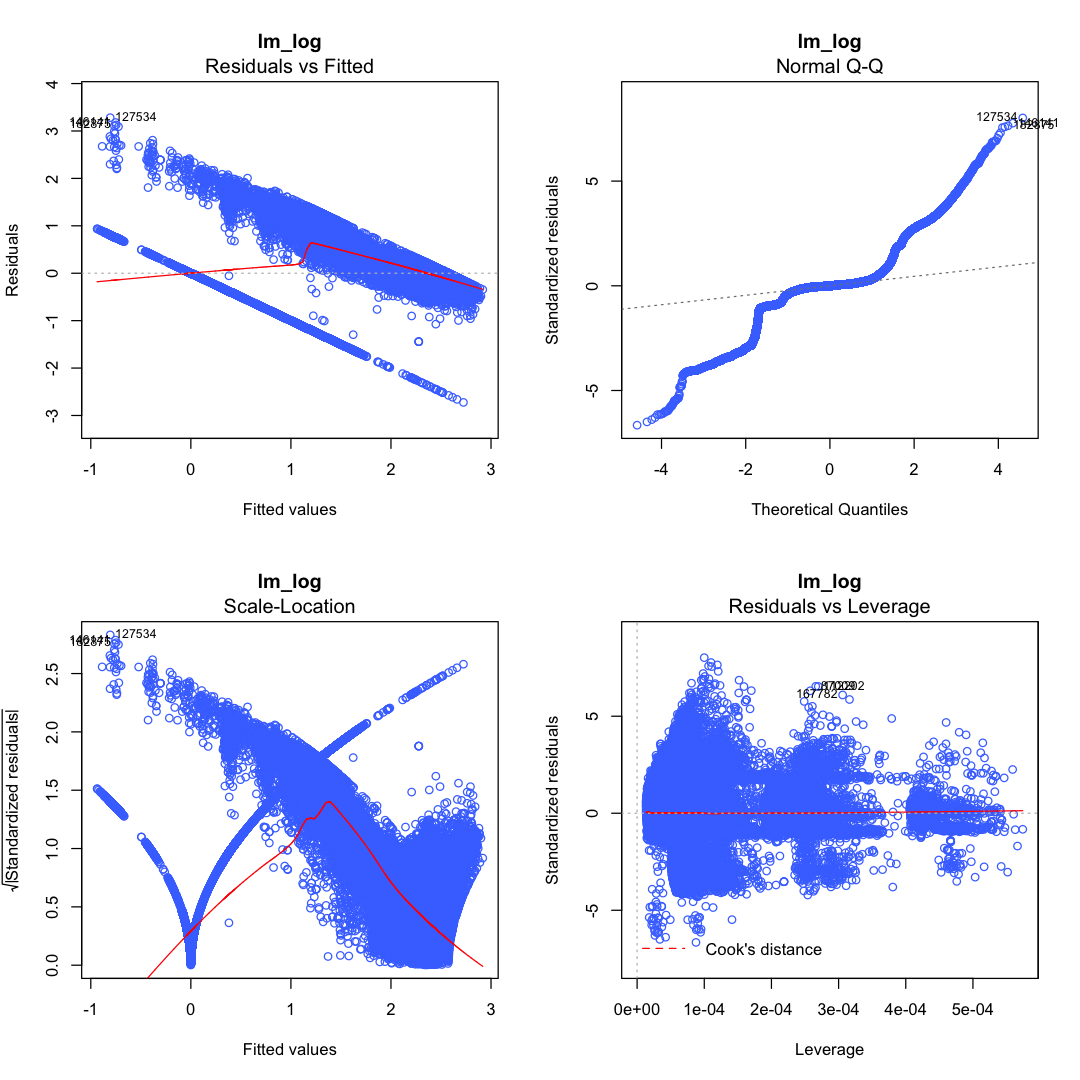

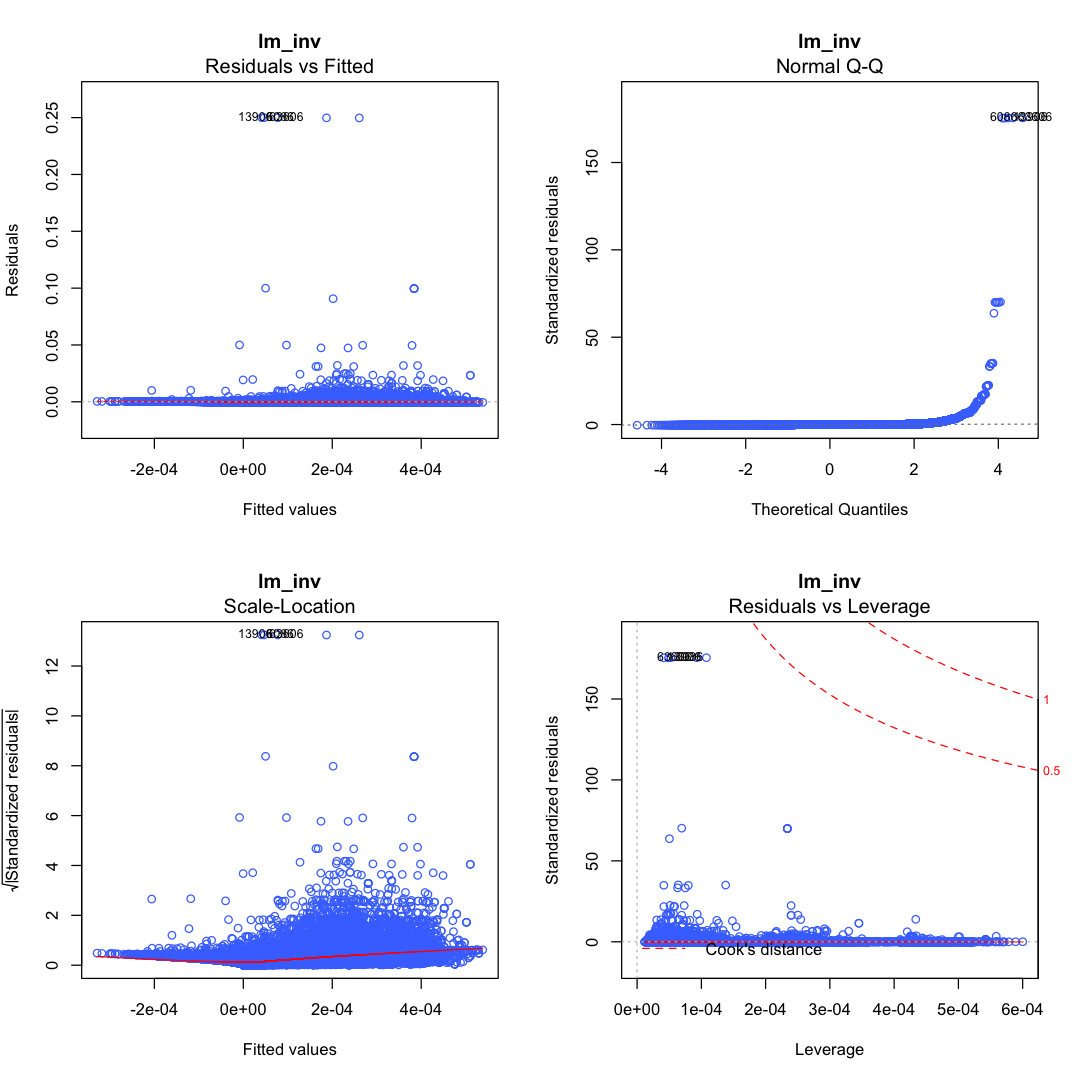

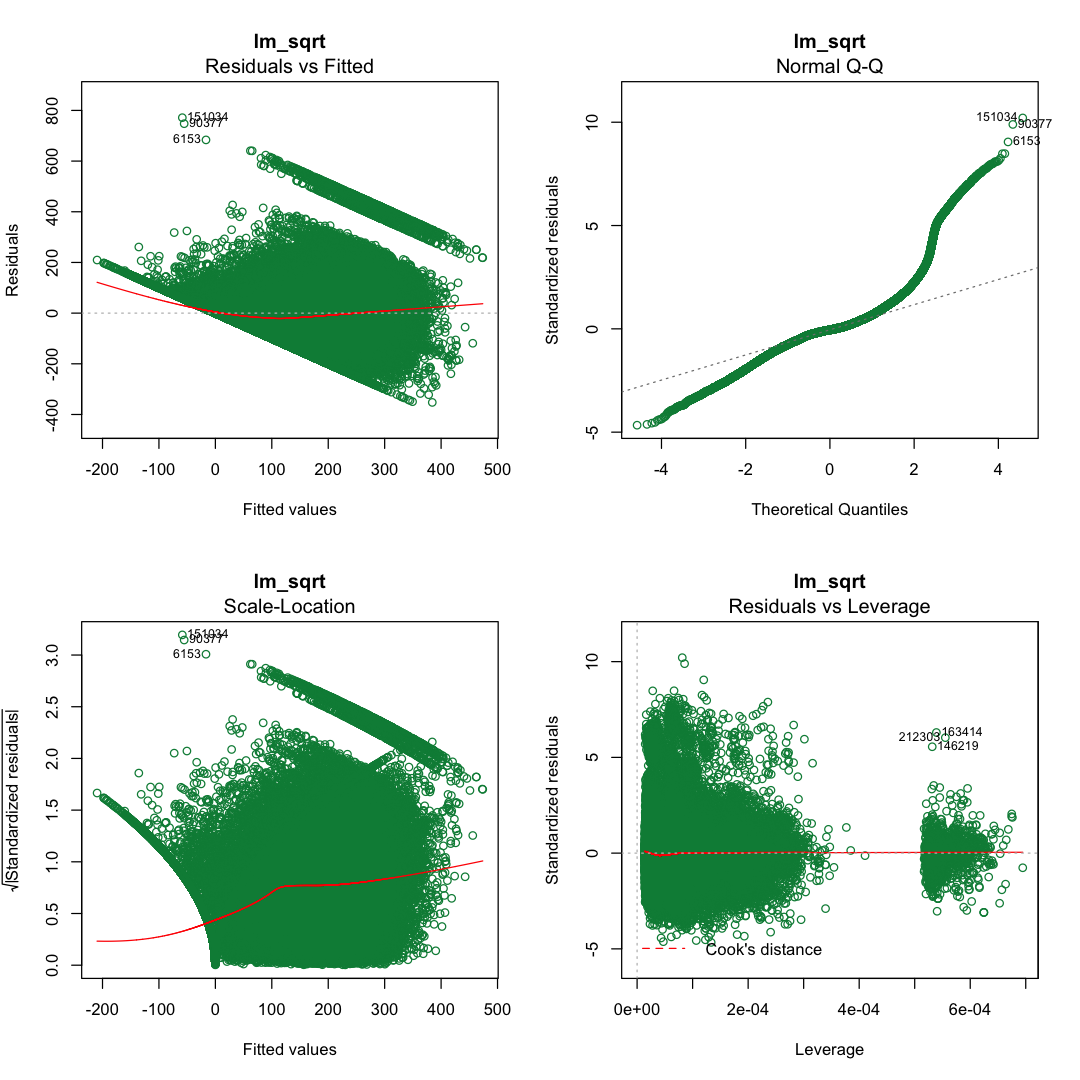

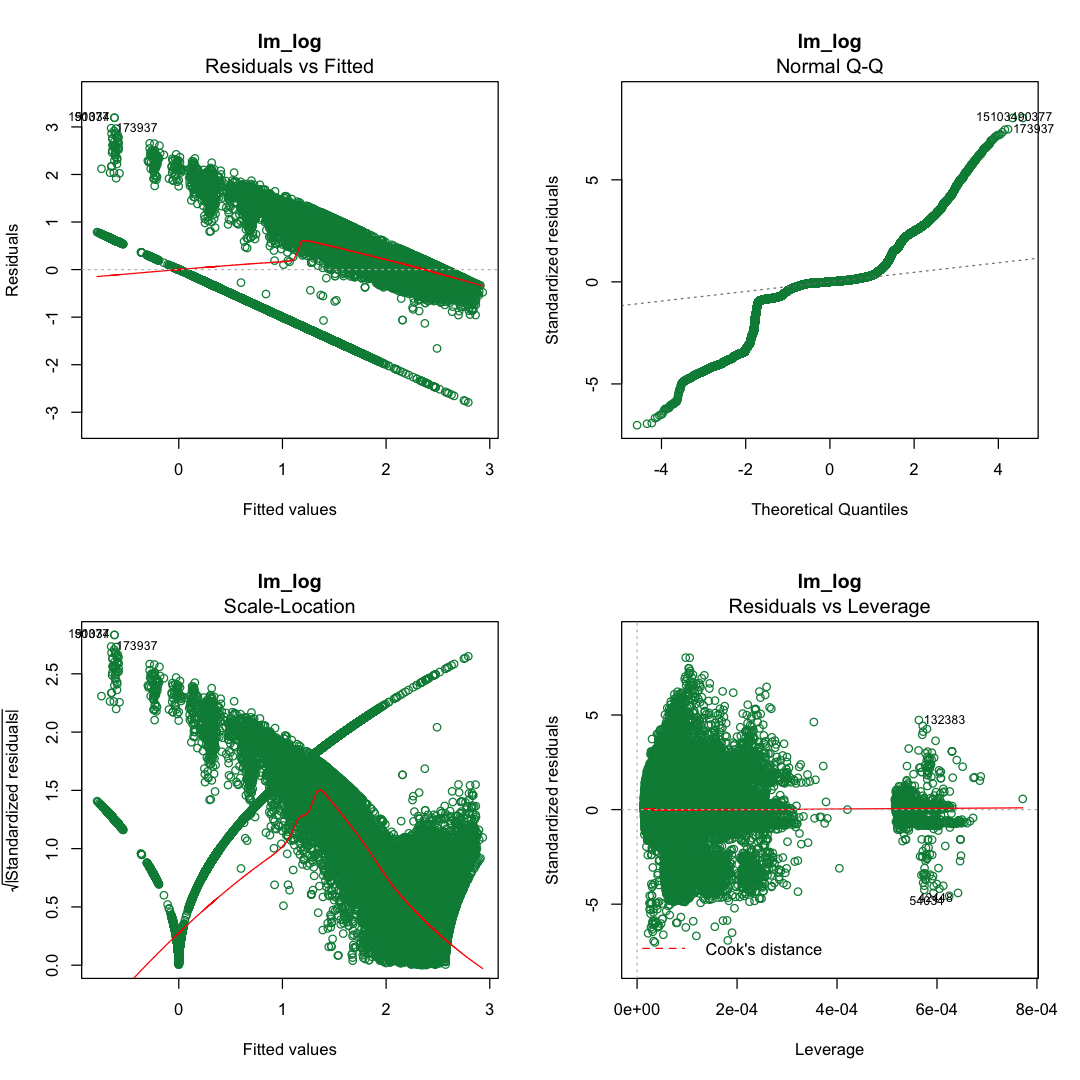

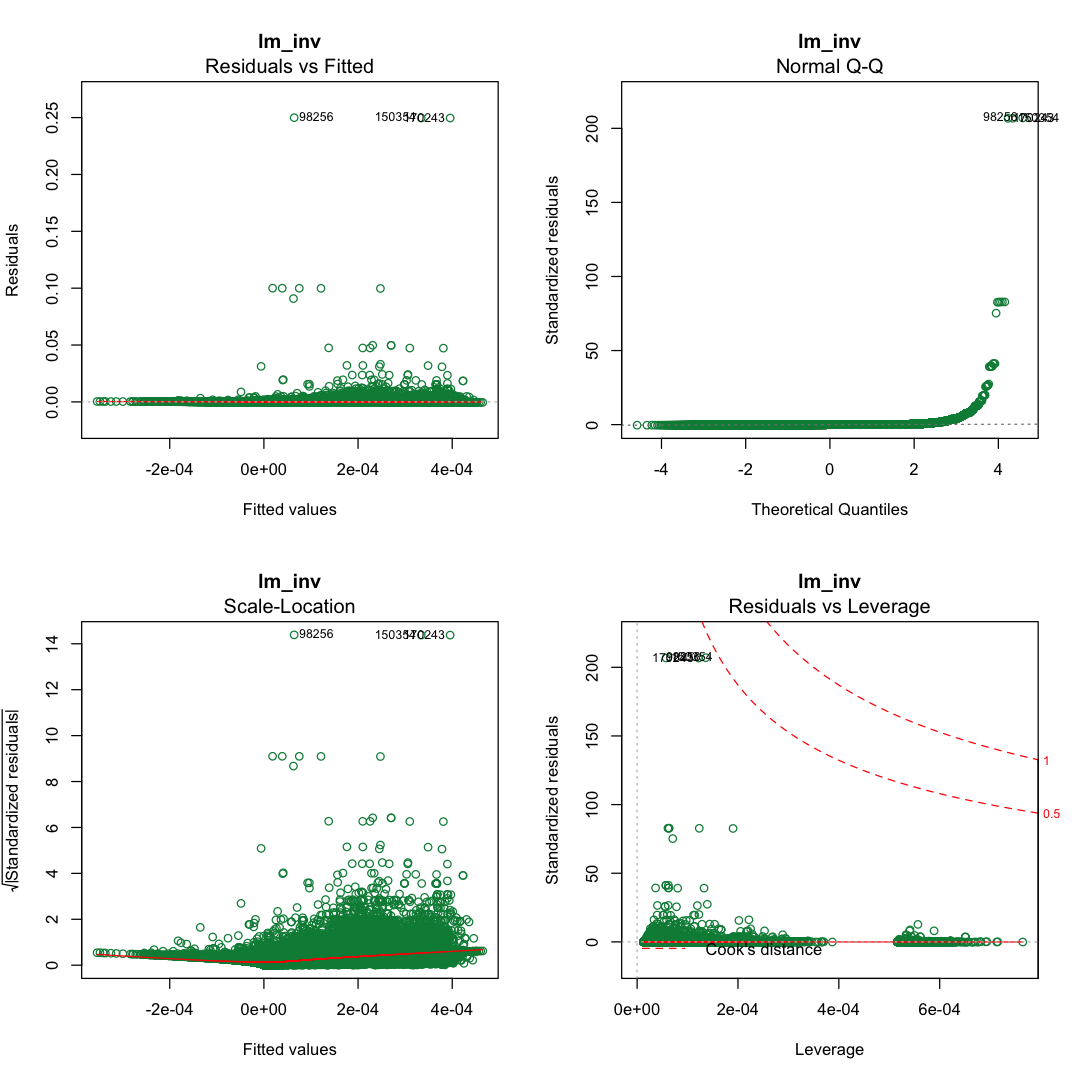

In [21]:
# Created transformation to square root, log, and inverse respectively to check constant variance.
testincome = c()
testincome$RACE = mn$RACE
testincome$CLASSWKR = mn$CLASSWKR
testincome$DIFFSENS = mn$DIFFSENS
testincome$SEX = mn$SEX

testincome$inc1 = sqrt(mn$INCWAGE)
testincome$sqrt_fam = sqrt(mn$FAMSIZE)
testincome$sqrt_age = sqrt(mn$AGE)
testincome$sqrt_mar = sqrt(mn$MARRNO)
testincome$sqrt_hrs = sqrt(mn$UHRSWORK)
testincome$sqrt_occ = sqrt(mn$OCCSCORE)

testincome$inc2 = mn$INCWAGE
testincome$log_fam = mn$FAMSIZE
testincome$log_age = mn$AGE
testincome$log_mar = mn$MARRNO
testincome$log_hrs = mn$UHRSWORK
testincome$log_occ = mn$OCCSCORE
testincome = na.omit(testincome)

# Takes the log transform of values greater than 0, 
# otherwise we will run into a computational error
testincome$inc2[testincome$inc2 > 0] = log(testincome$inc2[testincome$inc2 > 0])
testincome$inc2[testincome$inc2 > 0] = log(testincome$inc2[testincome$inc2 > 0])
testincome$log_fam[testincome$log_fam > 0] = log(testincome$log_fam[testincome$log_fam > 0])
testincome$log_age[testincome$log_age > 0] = log(testincome$log_age[testincome$log_age > 0])
testincome$log_mar[testincome$log_mar > 0] = log(testincome$log_mar[testincome$log_mar > 0])
testincome$log_hrs[testincome$log_hrs > 0] = log(testincome$log_hrs[testincome$log_hrs > 0])
testincome$log_occ[testincome$log_occ > 0] = log(testincome$log_occ[testincome$log_occ > 0])

testincome$inc3 = mn$INCWAGE
testincome$inv_fam = mn$FAMSIZE
testincome$inv_age = mn$AGE
testincome$inv_mar = mn$MARRNO
testincome$inv_hrs = mn$UHRSWORK
testincome$inv_occ = mn$OCCSCORE

# Takes the inverse transform of values greater than 0, 
# otherwise we will run into a computational error
testincome$inc3[testincome$inc3 > 0] = 1/testincome$inc3[testincome$inc3 > 0]
testincome$inv_fam[testincome$inv_fam > 0] = 1/testincome$inv_fam[testincome$inv_fam > 0]
testincome$inv_age[testincome$inv_age > 0] = 1/testincome$inv_age[testincome$inv_age > 0]
testincome$inv_mar[testincome$inv_mar > 0] = testincome$inv_mar[testincome$inv_mar > 0]
testincome$inv_hrs[testincome$inv_hrs > 0] = testincome$inv_hrs[testincome$inv_hrs > 0]
testincome$inv_occ[testincome$inv_occ > 0] = testincome$inv_occ[testincome$inv_occ > 0]

testincome = data.frame(testincome)

# Models

lm_sqrt = lm(inc1 ~ sqrt_fam + sqrt_age + sqrt_mar + sqrt_hrs + sqrt_occ + RACE + CLASSWKR +
             DIFFSENS + SEX, data = testincome)
lm_log = lm(inc2 ~ log_fam + log_age + log_mar + log_hrs + log_occ + RACE + CLASSWKR +
            DIFFSENS + SEX, data = testincome)
lm_inv = lm(inc3 ~ inv_fam + inv_age + inv_mar + inv_hrs + inv_occ + RACE + CLASSWKR +
            DIFFSENS + SEX, data = testincome)

# Plotting Residuals vs. Fitted, QQ Plot, etc. for lm_sqrt, lm_log, and lm_inv.
options(repr.plot.width = 9, repr.plot.height = 9)
par(mfrow = c(2,2))
plot(lm_sqrt, main = "lm_sqrt", col = "royalblue1")

par(mfrow = c(2,2))
plot(lm_log, main = "lm_log", col = "royalblue1")

par(mfrow = c(2,2))
plot(lm_inv, main = "lm_inv", col = "royalblue1")

# Created transformation to square root, log, and inverse respectively to check constant variance.
testincome = c()
testincome$RACE = co$RACE
testincome$CLASSWKR = co$CLASSWKR
testincome$DIFFSENS = co$DIFFSENS
testincome$SEX = co$SEX

testincome$inc1 = sqrt(co$INCWAGE)
testincome$sqrt_fam = sqrt(co$FAMSIZE)
testincome$sqrt_age = sqrt(co$AGE)
testincome$sqrt_mar = sqrt(co$MARRNO)
testincome$sqrt_hrs = sqrt(co$UHRSWORK)
testincome$sqrt_occ = sqrt(co$OCCSCORE)

testincome$inc2 = co$INCWAGE
testincome$log_fam = co$FAMSIZE
testincome$log_age = co$AGE
testincome$log_mar = co$MARRNO
testincome$log_hrs = co$UHRSWORK
testincome$log_occ = co$OCCSCORE
testincome = na.omit(testincome)

# Takes the log transform of values greater than 0, 
# otherwise we will run into a computational error
testincome$inc2[testincome$inc2 > 0] = log(testincome$inc2[testincome$inc2 > 0])
testincome$inc2[testincome$inc2 > 0] = log(testincome$inc2[testincome$inc2 > 0])
testincome$log_fam[testincome$log_fam > 0] = log(testincome$log_fam[testincome$log_fam > 0])
testincome$log_age[testincome$log_age > 0] = log(testincome$log_age[testincome$log_age > 0])
testincome$log_mar[testincome$log_mar > 0] = log(testincome$log_mar[testincome$log_mar > 0])
testincome$log_hrs[testincome$log_hrs > 0] = log(testincome$log_hrs[testincome$log_hrs > 0])
testincome$log_occ[testincome$log_occ > 0] = log(testincome$log_occ[testincome$log_occ > 0])

testincome$inc3 = co$INCWAGE
testincome$inv_fam = co$FAMSIZE
testincome$inv_age = co$AGE
testincome$inv_mar = co$MARRNO
testincome$inv_hrs = co$UHRSWORK
testincome$inv_occ = co$OCCSCORE

# Takes the inverse transform of values greater than 0, 
# otherwise we will run into a computational error
testincome$inc3[testincome$inc3 > 0] = 1/testincome$inc3[testincome$inc3 > 0]
testincome$inv_fam[testincome$inv_fam > 0] = 1/testincome$inv_fam[testincome$inv_fam > 0]
testincome$inv_age[testincome$inv_age > 0] = 1/testincome$inv_age[testincome$inv_age > 0]
testincome$inv_mar[testincome$inv_mar > 0] = testincome$inv_mar[testincome$inv_mar > 0]
testincome$inv_hrs[testincome$inv_hrs > 0] = testincome$inv_hrs[testincome$inv_hrs > 0]
testincome$inv_occ[testincome$inv_occ > 0] = testincome$inv_occ[testincome$inv_occ > 0]

testincome = data.frame(testincome)

# Models

lm_sqrt = lm(inc1 ~ sqrt_fam + sqrt_age + sqrt_mar + sqrt_hrs + sqrt_occ + RACE + CLASSWKR +
             DIFFSENS + SEX, data = testincome)
lm_log = lm(inc2 ~ log_fam + log_age + log_mar + log_hrs + log_occ + RACE + CLASSWKR +
            DIFFSENS + SEX, data = testincome)
lm_inv = lm(inc3 ~ inv_fam + inv_age + inv_mar + inv_hrs + inv_occ + RACE + CLASSWKR +
            DIFFSENS + SEX, data = testincome)

# Plotting Residuals vs. Fitted, QQ Plot, etc. for lm_sqrt, lm_log, and lm_inv.
options(repr.plot.width = 9, repr.plot.height = 9)
par(mfrow = c(2,2))
plot(lm_sqrt, main = "lm_sqrt", col = "springgreen4")

par(mfrow = c(2,2))
plot(lm_log, main = "lm_log", col = "springgreen4")

par(mfrow = c(2,2))
plot(lm_inv, main = "lm_inv", col = "springgreen4")

# Checking for Collinearity

## Minnesota ##

In [44]:
# Since the transformations failed, 
# we are going to continue with our original model without transformations

v = vif(lm_3)
k = kappa(lm_3)
correlation = cor(model.matrix(lm_3)[,-1])

# has the highest VIF with approximately 
v; k; correlation

GVIF     Df GVIF^(1/(2*Df))
SEX      1.094357 1  1.046115       
AGE      1.489910 1  1.220619       
MARRNO   1.378145 1  1.173944       
EDUC     1.095719 1  1.046766       
CLASSWKR 1.054504 1  1.026890       
UHRSWORK 1.130608 1  1.063301       
OCCSCORE 1.146429 1  1.070714       
DIFFSENS 1.037748 1  1.018699       
RACE     1.041483 4  1.005094

[1] 1596.113

SEXMale       AGE         MARRNO     
SEXMale                                  1.0000000000  0.01589022 -0.05270938
AGE                                      0.0158902169  1.00000000  0.50397538
MARRNO                                  -0.0527093811  0.50397538  1.00000000
EDUCHigh School or Less                  0.0903081677  0.05496886 -0.03035469
CLASSWKRWorks for wages                 -0.1240262800 -0.17298597 -0.09324877
UHRSWORK                                 0.1790333321 -0.14544644  0.02201649
OCCSCORE                                 0.1389476938  0.09055210  0.11199324
DIFFSENSNo vision or hearing difficulty -0.0634060760 -0.15781063 -0.05837363
RACEAsian American or Pacific Islander  -0.0091757098 -0.09165623 -0.05635107
RACEBlack/African American               0.0091866345 -0.07485224 -0.06033577
RACEOther Race                           0.0016414638 -0.09020428 -0.05812981
RACEWhite                               -0.0007759423  0.15196862  0.11143330
                                        EDUCHigh School or Less
SEXMale                                  0.09030817            
AGE                                      0.05496886            
MARRNO                                  -0.03035469            
EDUCHigh School or Less                  1.00000000            
CLASSWKRWorks for wages                 -0.03495163            
UHRSWORK                                -0.09487510            
OCCSCORE                                -0.23976513            
DIFFSENSNo vision or hearing difficulty -0.05347234            
RACEAsian American or Pacific Islander  -0.00511433            
RACEBlack/African American               0.03912767            
RACEOther Race                           0.04389991            
RACEWhite                               -0.05794417            
                                        CLASSWKRWorks for wages UHRSWORK    
SEXMale                                 -0.12402628              0.179033332
AGE                                     -0.17298597             -0.145446437
MARRNO                                  -0.09324877              0.022016490
EDUCHigh School or Less                 -0.03495163             -0.094875101
CLASSWKRWorks for wages                  1.00000000             -0.062110687
UHRSWORK                                -0.06211069              1.000000000
OCCSCORE                                -0.01822958              0.199802214
DIFFSENSNo vision or hearing difficulty  0.03074447              0.088233980
RACEAsian American or Pacific Islander   0.03642706             -0.008243441
RACEBlack/African American               0.03616174             -0.034358175
RACEOther Race                           0.02631587             -0.015506294
RACEWhite                               -0.06430331              0.040217942
                                        OCCSCORE   
SEXMale                                  0.13894769
AGE                                      0.09055210
MARRNO                                   0.11199324
EDUCHigh School or Less                 -0.23976513
CLASSWKRWorks for wages                 -0.01822958
UHRSWORK                                 0.19980221
OCCSCORE                                 1.00000000
DIFFSENSNo vision or hearing difficulty  0.01737578
RACEAsian American or Pacific Islander   0.01216172
RACEBlack/African American              -0.06114461
RACEOther Race                          -0.03961937
RACEWhite                                0.06244871
                                        DIFFSENSNo vision or hearing difficulty
SEXMale                                 -0.063406076                           
AGE                                     -0.157810628                           
MARRNO                                  -0.058373628                           
EDUCHigh School or Less                 -0.053472339                           
CLASSWKRWorks for wages                  0.030744468                           
UHRSWORK                             

## Colorado ##

In [45]:
v_c = vif(lmc_3)
k_c = kappa(lmc_3)
correlation_c = cor(model.matrix(lmc_3)[,-1])

# has the highest VIF wih approximately 
v_c; k_c; correlation_c

GVIF     Df GVIF^(1/(2*Df))
SEX      1.073066 1  1.035889       
AGE      1.522834 1  1.234031       
MARRNO   1.411627 1  1.188119       
EDUC     1.092957 1  1.045446       
CLASSWKR 1.043242 1  1.021392       
UHRSWORK 1.113629 1  1.055286       
OCCSCORE 1.162612 1  1.078245       
DIFFSENS 1.033235 1  1.016481       
RACE     1.027362 4  1.003380

[1] 1827.276

SEXMale      AGE          MARRNO     
SEXMale                                  1.000000000 -0.002293023 -0.05247277
AGE                                     -0.002293023  1.000000000  0.53074454
MARRNO                                  -0.052472767  0.530744539  1.00000000
EDUCHigh School or Less                  0.060367617 -0.057444831 -0.02690504
CLASSWKRWorks for wages                 -0.054662481 -0.188013298 -0.10864202
UHRSWORK                                 0.181551343 -0.146349256 -0.01635342
OCCSCORE                                 0.137930244  0.145552930  0.11392736
DIFFSENSNo vision or hearing difficulty -0.052267087 -0.152180127 -0.07004317
RACEAsian American or Pacific Islander  -0.016297114 -0.038489256 -0.02799600
RACEBlack/African American               0.012324631 -0.034290351 -0.03727250
RACEOther Race                           0.004744412 -0.081792011 -0.05031050
RACEWhite                                0.001874621  0.097533419  0.07126967
                                        EDUCHigh School or Less
SEXMale                                  0.06036762            
AGE                                     -0.05744483            
MARRNO                                  -0.02690504            
EDUCHigh School or Less                  1.00000000            
CLASSWKRWorks for wages                  0.02452736            
UHRSWORK                                -0.07450211            
OCCSCORE                                -0.25441111            
DIFFSENSNo vision or hearing difficulty -0.03673940            
RACEAsian American or Pacific Islander  -0.01194223            
RACEBlack/African American               0.03290710            
RACEOther Race                           0.09295946            
RACEWhite                               -0.08471287            
                                        CLASSWKRWorks for wages UHRSWORK    
SEXMale                                 -0.05466248              0.181551343
AGE                                     -0.18801330             -0.146349256
MARRNO                                  -0.10864202             -0.016353420
EDUCHigh School or Less                  0.02452736             -0.074502112
CLASSWKRWorks for wages                  1.00000000              0.029511589
UHRSWORK                                 0.02951159              1.000000000
OCCSCORE                                -0.06815445              0.192417900
DIFFSENSNo vision or hearing difficulty  0.02879043              0.074012383
RACEAsian American or Pacific Islander   0.01507328              0.005813347
RACEBlack/African American               0.03498386             -0.007458698
RACEOther Race                           0.03055445              0.001544224
RACEWhite                               -0.05198852              0.002454735
                                        OCCSCORE   
SEXMale                                  0.13793024
AGE                                      0.14555293
MARRNO                                   0.11392736
EDUCHigh School or Less                 -0.25441111
CLASSWKRWorks for wages                 -0.06815445
UHRSWORK                                 0.19241790
OCCSCORE                                 1.00000000
DIFFSENSNo vision or hearing difficulty  0.01472749
RACEAsian American or Pacific Islander   0.01293115
RACEBlack/African American              -0.04760721
RACEOther Race                          -0.06196067
RACEWhite                                0.06890582
                                        DIFFSENSNo vision or hearing difficulty
SEXMale                                 -0.052267087                           
AGE                                     -0.152180127                           
MARRNO                                  -0.070043171                           
EDUCHigh School or Less                 -0.036739405                           
CLASSWKRWorks for wages                  0.028790434                           
UHRSWORK                             

## Removing Predictor with the Highest VIF ##

## Minnesota ##

In [46]:
#Removing predictor with the highest VIF
lm_3 = update(lm_3, .~. - CLASSWKR)
vif(lm_3)
kappa(lm_3)

GVIF     Df GVIF^(1/(2*Df))
SEX      1.081409 1  1.039908       
AGE      1.458392 1  1.207639       
MARRNO   1.378045 1  1.173902       
EDUC     1.095357 1  1.046593       
UHRSWORK 1.125036 1  1.060677       
OCCSCORE 1.145687 1  1.070368       
DIFFSENS 1.037748 1  1.018699       
RACE     1.039912 4  1.004904

[1] 1668.865

In [47]:
lm_3 = update(lm_3, .~. - UHRSWORK)
vif(lm_3)
kappa(lm_3)

GVIF     Df GVIF^(1/(2*Df))
SEX      1.047150 1  1.023303       
AGE      1.405275 1  1.185443       
MARRNO   1.362036 1  1.167063       
EDUC     1.092658 1  1.045303       
OCCSCORE 1.114765 1  1.055824       
DIFFSENS 1.032751 1  1.016244       
RACE     1.037298 4  1.004588

[1] 1716.376

## Colorado ##

In [48]:
#Removing predictor with the highest VIF
lmc_3 = update(lmc_3, .~. - CLASSWKR)
vif(lmc_3)
kappa(lmc_3)

GVIF     Df GVIF^(1/(2*Df))
SEX      1.069800 1  1.034312       
AGE      1.493098 1  1.221924       
MARRNO   1.411378 1  1.188014       
EDUC     1.092890 1  1.045414       
UHRSWORK 1.113115 1  1.055043       
OCCSCORE 1.161431 1  1.077697       
DIFFSENS 1.033231 1  1.016480       
RACE     1.026017 4  1.003216

[1] 1904.556

In [49]:
lmc_3 = update(lmc_3, .~. - UHRSWORK)
vif(lmc_3)
kappa(lmc_3)

GVIF     Df GVIF^(1/(2*Df))
SEX      1.038850 1  1.019240       
AGE      1.442578 1  1.201073       
MARRNO   1.402842 1  1.184416       
EDUC     1.090384 1  1.044214       
OCCSCORE 1.126331 1  1.061288       
DIFFSENS 1.030213 1  1.014994       
RACE     1.025988 4  1.003212

[1] 1940.795

# MSE and MSPE

In [22]:
set.seed(00000)
n = nrow(mn)
split = floor(0.80 * n)

sample_set = sample.int(n, size = split, replace = FALSE)

train_m = mn[sample_set, ]
test_m = mn[-sample_set, ]

n = nrow(co)
split = floor(0.80 * n)

sample_set = sample.int(n, size = split, replace = FALSE)

train_c = co[sample_set, ]
test_c =  co[-sample_set, ]

In [24]:
mlr_inc_m = lm(INCWAGE ~ SEX + AGE + MARRNO + EDUC + 
             UHRSWORK + OCCSCORE + DIFFSENS + RACE, data = train_m)
mlr_inc_c = lm(INCWAGE ~ SEX + AGE + MARRNO + EDUC + 
             UHRSWORK + OCCSCORE + DIFFSENS + RACE, data = train_c)

summary(mlr_inc_m)
summary(mlr_inc_c)


Call:
lm(formula = INCWAGE ~ SEX + AGE + MARRNO + EDUC + UHRSWORK + 
    OCCSCORE + DIFFSENS + RACE, data = train_m)

Residuals:
    Min      1Q  Median      3Q     Max 
-136942  -17789   -2402   10713  495317 

Coefficients:
                                          Estimate Std. Error t value Pr(>|t|)
(Intercept)                             -27625.824    645.081 -42.825  < 2e-16
SEXMale                                   4827.365    213.029  22.661  < 2e-16
AGE                                        271.132      7.274  37.277  < 2e-16
MARRNO                                    2977.697    175.626  16.955  < 2e-16
EDUCHigh School or Less                 -11243.827    219.040 -51.332  < 2e-16
UHRSWORK                                   875.083      6.676 131.082  < 2e-16
OCCSCORE                                   926.172      9.357  98.982  < 2e-16
DIFFSENSNo vision or hearing difficulty   1861.343    421.949   4.411 1.03e-05
RACEOther Race                           -1185.780    730.400 


Call:
lm(formula = INCWAGE ~ SEX + AGE + MARRNO + EDUC + UHRSWORK + 
    OCCSCORE + DIFFSENS + RACE, data = train_c)

Residuals:
    Min      1Q  Median      3Q     Max 
-154285  -20674   -3930   11520  495997 

Coefficients:
                                          Estimate Std. Error t value Pr(>|t|)
(Intercept)                             -45366.380    679.317 -66.782  < 2e-16
SEXMale                                   7340.961    234.095  31.359  < 2e-16
AGE                                        335.890      8.009  41.941  < 2e-16
MARRNO                                    2734.373    174.530  15.667  < 2e-16
EDUCCollege or More                      10959.521    246.546  44.452  < 2e-16
UHRSWORK                                  1038.669      7.226 143.742  < 2e-16
OCCSCORE                                   877.702      9.630  91.142  < 2e-16
DIFFSENSNo vision or hearing difficulty   3521.484    471.188   7.474 7.84e-14
RACEBlack/African American               -3999.017    673.276 

In [38]:
# MSPE for Minnesota
k = nrow(test_m) #number of rows

y = train_m$INCWAGE
y_star = test_m$INCWAGE

X = cbind(1, train_m$AGE, train_m$SEX, train_m$FAMSIZE, train_m$MARRNO, 
          train_m$EDUC, train_m$DIFFSENS, train_m$UHRSWORK, train_m$OCCSCORE) #train model

X_star = cbind(1, test_m$AGE, test_m$SEX, test_m$FAMSIZE, test_m$MARRNO, 
               test_m$EDUC, test_m$DIFFSENS, test_m$UHRSWORK, test_m$OCCSCORE) #test model

beta = solve(t(X)%*%X)%*%t(X)%*%y

y_hat_star = X_star%*%beta #i'th response value in test set

MSPE_m = (1/k)*sum((y_star - y_hat_star)^2)

cat("MSPE for the Minnesota dataset is:", MSPE_m, "\n")


# # MSPE for Colorado
k = nrow(test_c)

y = train_c$INCWAGE
y_star = test_c$INCWAGE

X = cbind(1, train_c$AGE, train_c$SEX, train_c$FAMSIZE, train_c$MARRNO, 
          train_c$EDUC, train_c$DIFFSENS, train_c$UHRSWORK, train_c$OCCSCORE) #train model
X_star = cbind(1, test_c$AGE, test_c$SEX, test_c$FAMSIZE, test_c$MARRNO, 
               test_c$EDUC, test_c$DIFFSENS, test_c$UHRSWORK, test_c$OCCSCORE) #test model

beta = solve(t(X)%*%X)%*%t(X)%*%y

y_hat_star = X_star%*%beta

MSPE_c = (1/k)*sum((y_star - y_hat_star)^2)

cat("MSPE for the Colorado dataset is:", MSPE_c)

MSPE on the Minnesota dataset is: 1759216848 
MSPE on the Colorado dataset is: 2139447779

In [40]:
# MSE for Minnesota
n = nrow(train_m) # number of rows
y = train_m$INCWAGE
X = cbind(1, train_m$AGE, train_m$FAMSIZE, train_m$MARRNO, train_m$UHRSWORK, train_m$OCCSCORE)
beta = solve(t(X)%*%X)%*%t(X)%*%y #beta hat
y_hat = X%*%beta # computing y_hat
MSE_m = (1/n)*sum((y - y_hat)^2); 

cat("MSE for the Minnesota dataset is:", MSPE_m, "\n")


# MSE for Colorado
n = nrow(train_c) # number of rows
y = train_c$INCWAGE
X = cbind(1, train_c$AGE, train_c$FAMSIZE, train_c$MARRNO, train_c$UHRSWORK, train_c$OCCSCORE)
beta = solve(t(X)%*%X)%*%t(X)%*%y #beta hat
y_hat = X%*%beta # computing y_hat
MSE_c = (1/n)*sum((y - y_hat)^2); 

cat("MSE for the Colorado dataset is:", MSE_c)

MSE for the Minnesota dataset is: 1759216848 
MSE for the Colorado dataset is: 2248374967

In [33]:
MSE_m - MSPE_m

MSE_c - MSPE_c

[1] 107059387

[1] 108927188

# Logistic Regression

In [11]:
mn$EDUC = as_factor(mn$EDUC)
mn$DIFFSENS = as_factor(mn$DIFFSENS)
mn$SEX = as_factor(mn$SEX)
mn$RACE = as_factor(mn$RACE)

co$EDUC = as_factor(co$EDUC)
co$CLASSWKR = as_factor(co$CLASSWKR)
co$DIFFSENS = as_factor(co$DIFFSENS)
co$SEX = as_factor(co$SEX)
co$RACE = as_factor(co$RACE)

In [12]:
mn$INCTHRES = NA
mn$INCTHRES[mn$INCWAGE < 35000] =  0
mn$INCTHRES[mn$INCWAGE > 35000] =  1

co$INCTHRESH = NA
co$INCTHRESH[co$INCWAGE < 35000] =  0
co$INCTHRESH[co$INCWAGE > 35000] =  1

In [13]:
glm_mn = glm(INCTHRES ~ SEX + AGE + MARRNO + EDUC + 
             UHRSWORK + OCCSCORE + DIFFSENS + RACE, data = mn, family = binomial)
summary(glm_mn)

glm_co = glm(INCTHRESH ~ SEX + AGE + MARRNO + EDUC + 
             CLASSWKR + UHRSWORK + OCCSCORE + DIFFSENS + RACE, data = co, 
             family = binomial)
summary(glm_co)


Call:
glm(formula = INCTHRES ~ SEX + AGE + MARRNO + EDUC + UHRSWORK + 
    OCCSCORE + DIFFSENS + RACE, family = binomial, data = mn)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.9409  -0.5454  -0.1122   0.6806   3.1220  

Coefficients:
                                          Estimate Std. Error  z value Pr(>|z|)
(Intercept)                             -5.8211565  0.0510955 -113.927  < 2e-16
SEXMale                                  0.1697083  0.0126977   13.365  < 2e-16
AGE                                      0.0015311  0.0004942    3.098  0.00195
MARRNO                                   0.3972877  0.0107040   37.116  < 2e-16
EDUCHigh School or Less                 -0.8340890  0.0132142  -63.121  < 2e-16
UHRSWORK                                 0.0878443  0.0005493  159.907  < 2e-16
OCCSCORE                                 0.0606324  0.0006627   91.494  < 2e-16
DIFFSENSNo vision or hearing difficulty  0.5020317  0.0352454   14.244  < 2e-16
RACEOther Race   


Call:
glm(formula = INCTHRESH ~ SEX + AGE + MARRNO + EDUC + CLASSWKR + 
    UHRSWORK + OCCSCORE + DIFFSENS + RACE, family = binomial, 
    data = co)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.1154  -0.4651  -0.0001   0.5790   3.5993  

Coefficients:
                                          Estimate Std. Error z value Pr(>|z|)
(Intercept)                             -2.242e+01  4.818e+01  -0.465 0.641689
SEXMale                                  2.478e-01  1.336e-02  18.543  < 2e-16
AGE                                      2.132e-02  5.424e-04  39.300  < 2e-16
MARRNO                                   3.026e-01  1.031e-02  29.340  < 2e-16
EDUCCollege or More                      8.346e-01  1.441e-02  57.921  < 2e-16
CLASSWKRSelf-employed                    1.236e+01  4.818e+01   0.256 0.797609
CLASSWKRWorks for wages                  1.446e+01  4.818e+01   0.300 0.764048
UHRSWORK                                 1.005e-01  6.234e-04 161.185  < 2e-16
OCCSCORE 

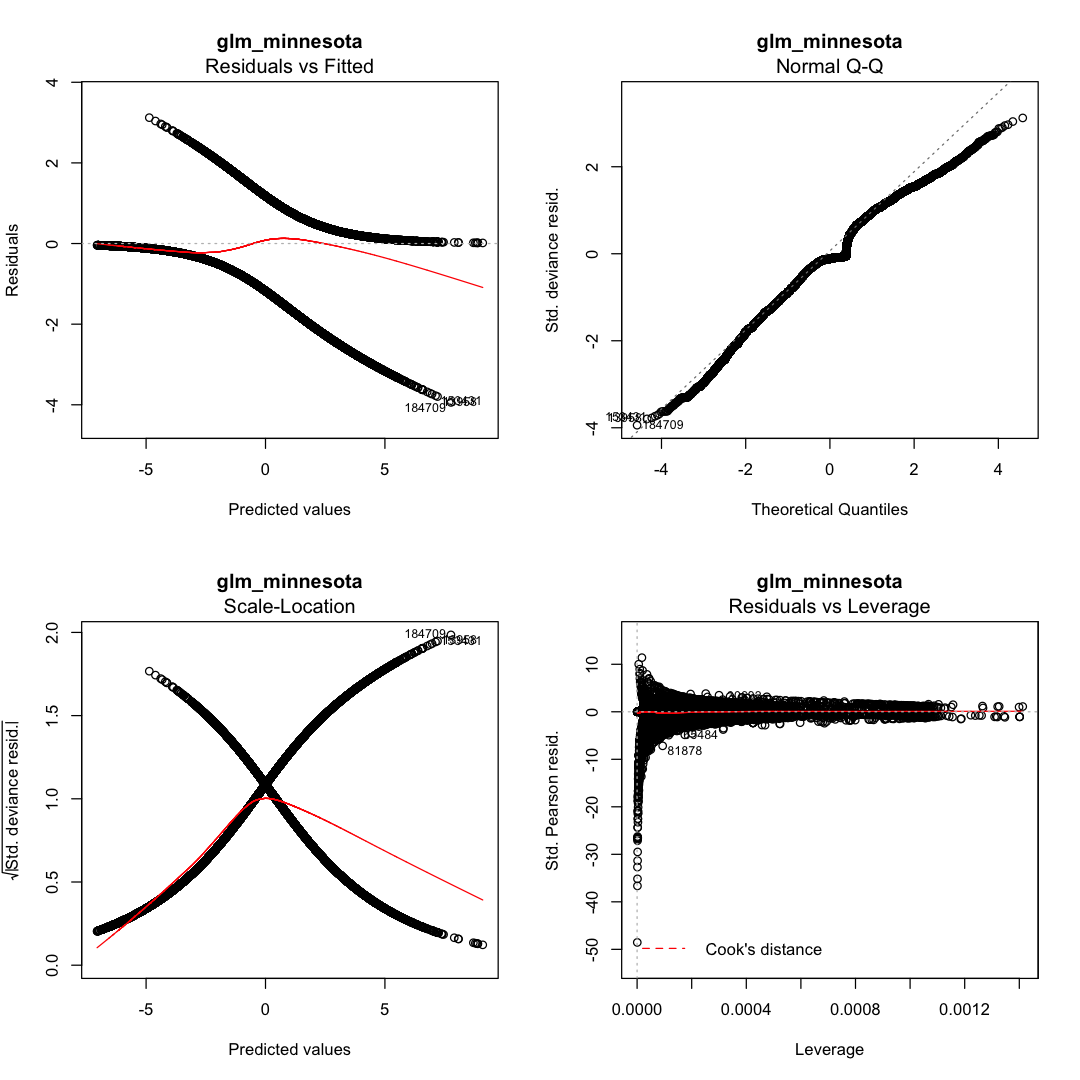

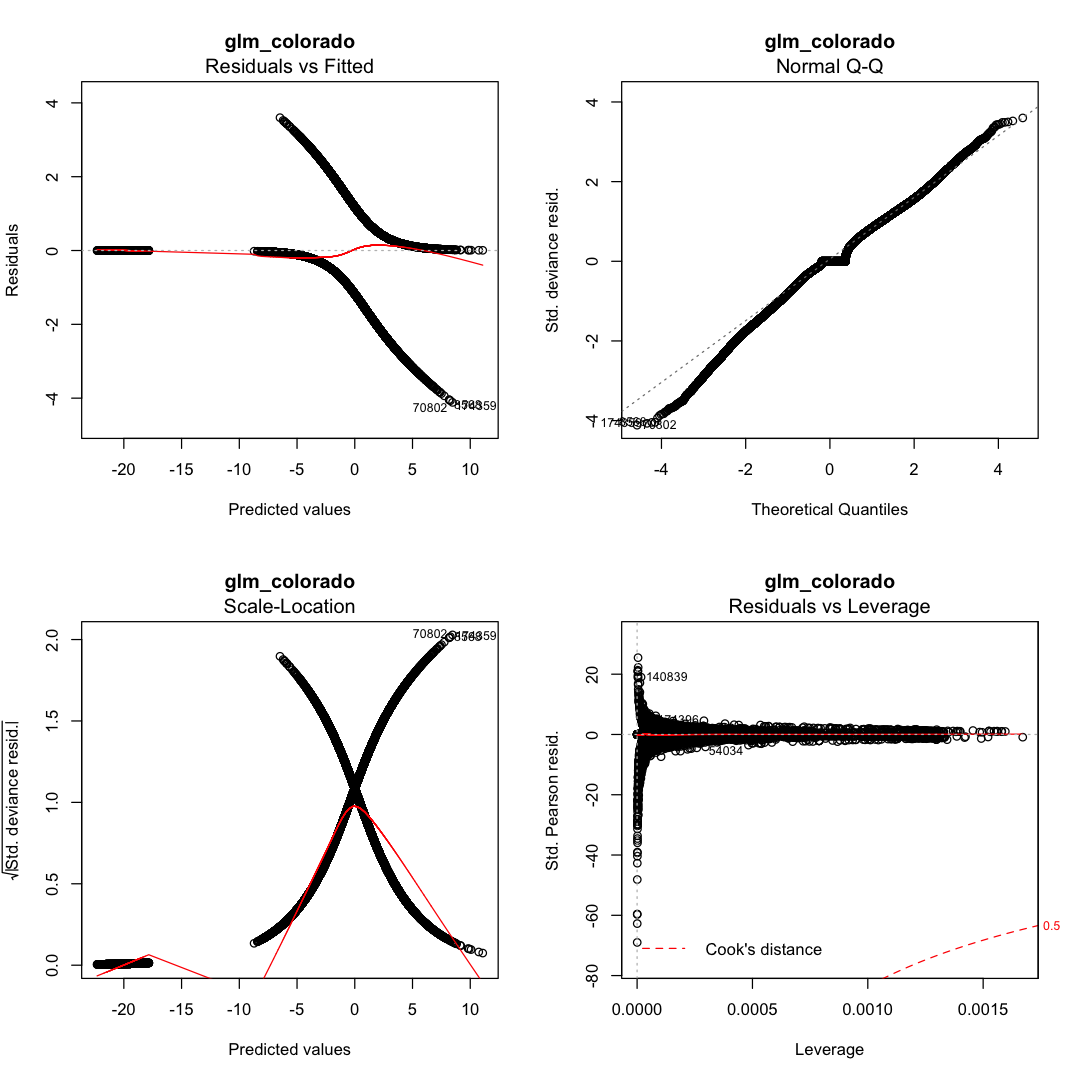

In [41]:
options(repr.plot.width = 9, repr.plot.height = 9)
par(mfrow = c(2,2))
plot(glm_mn, main = "glm_minnesota")
plot(glm_co, main = "glm_colorado")

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


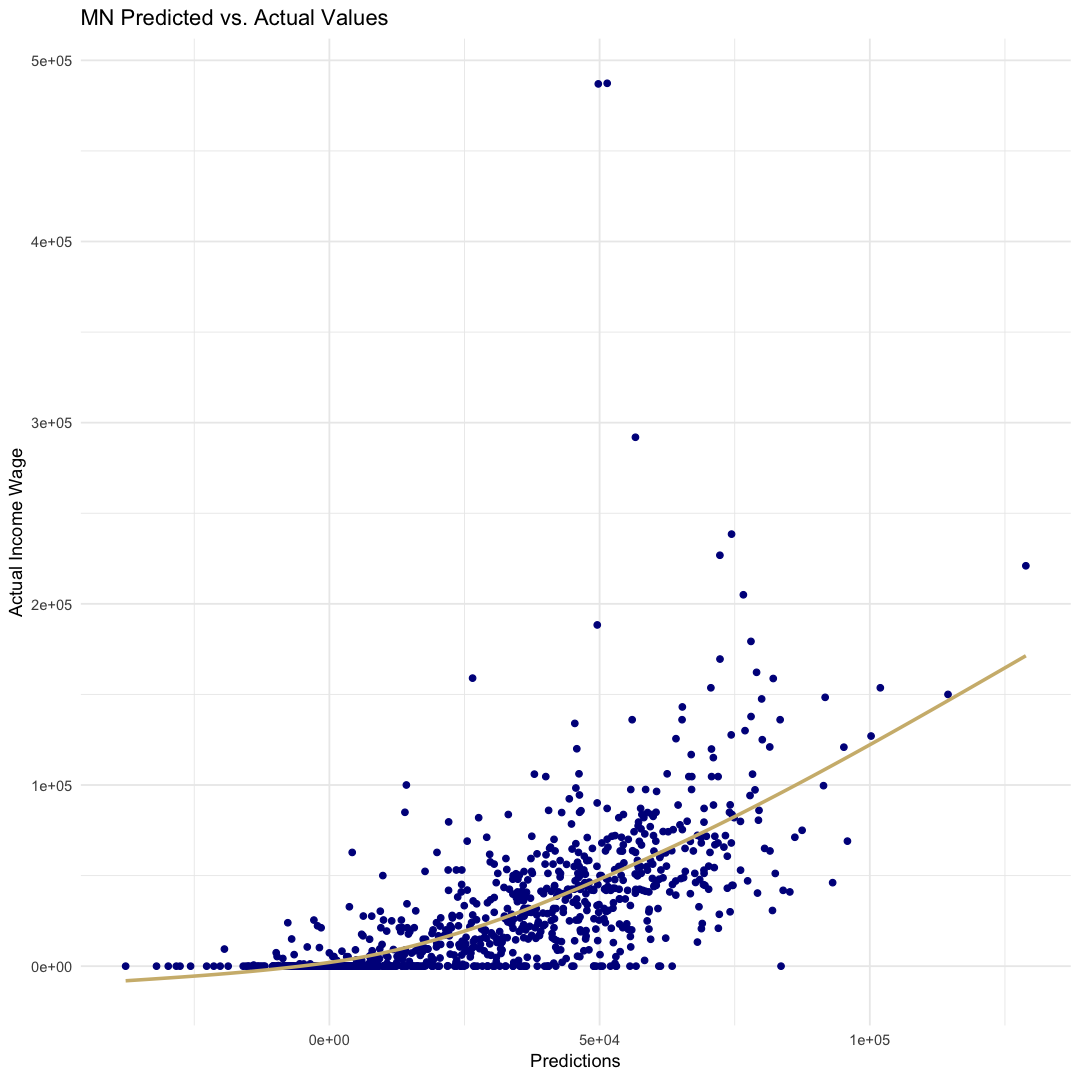

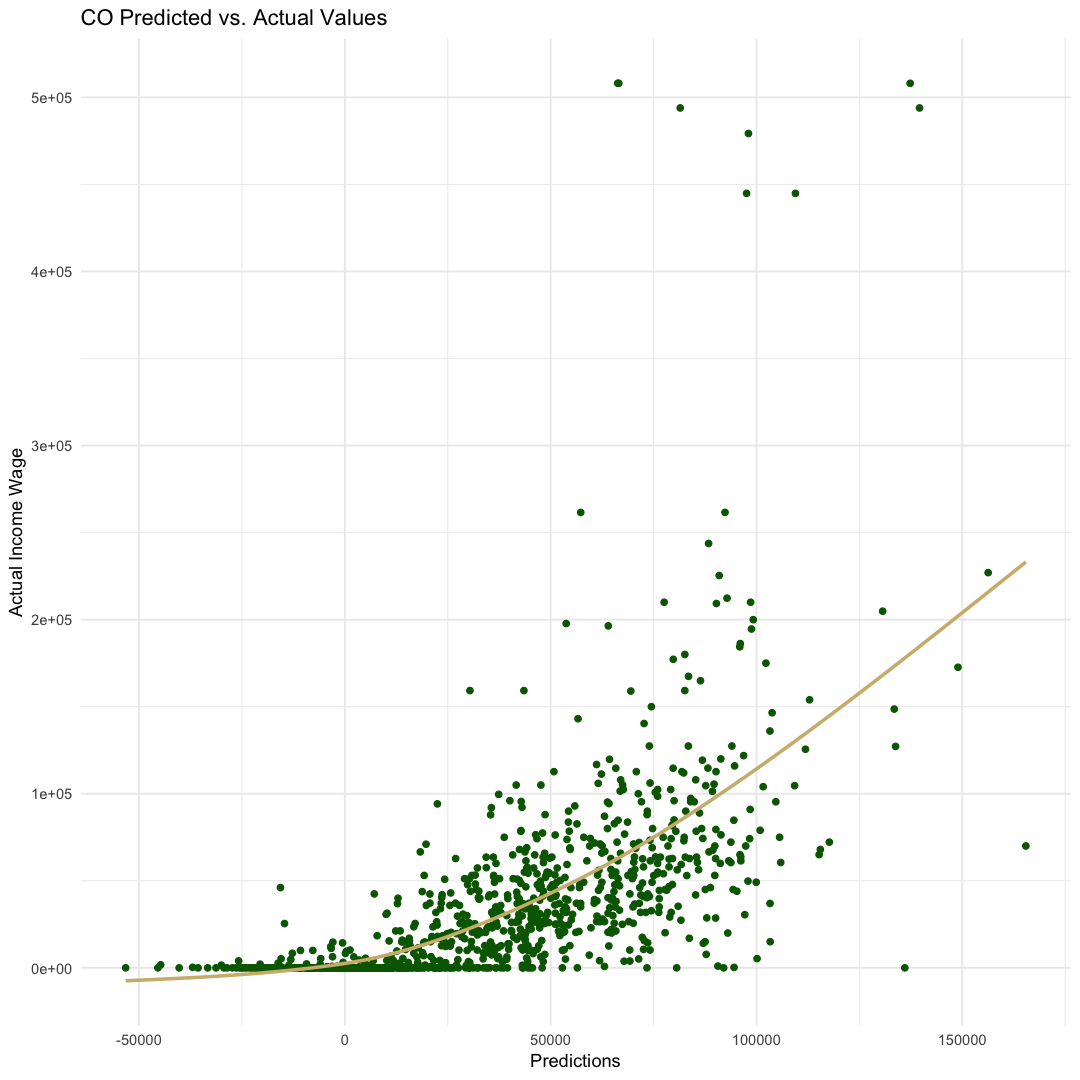

In [19]:
set.seed(00000)
n = nrow(mn)
split = floor(0.004671 * n)

sample_set = sample.int(n, size = split, replace = FALSE)

tinyTest = mn[sample_set, ]


lmod = lm(INCWAGE ~ SEX + AGE + MARRNO + EDUC + 
             CLASSWKR + UHRSWORK + OCCSCORE + DIFFSENS + RACE, tinyTest)
 
ggplot(tinyTest, aes(x = predict(lmod, type = 'response'), y = INCWAGE )) + 
    geom_point(col = "dark blue") + 
    geom_smooth(se = F, col = "#CFB87C") +
    labs(x = 'Predictions', y= 'Actual Income Wage',title='MN Predicted vs. Actual Values') + 
    theme_minimal()

set.seed(00000)
n = nrow(co)
split = floor(0.004671 * n)

sample_set = sample.int(n, size = split, replace = FALSE)

tinyTest = co[sample_set, ]


lmod = lm(INCWAGE ~ SEX + AGE + MARRNO + EDUC + 
             CLASSWKR + UHRSWORK + OCCSCORE + DIFFSENS + RACE, tinyTest)
 
ggplot(tinyTest, aes(x = predict(lmod, type = 'response'), y = INCWAGE )) + 
    geom_point(col = "dark green") + 
    geom_smooth(se = F, col = "#CFB87C") +
    labs(x = 'Predictions', y= 'Actual Income Wage',title='CO Predicted vs. Actual Values') + 
    theme_minimal()